<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [1]:
#@title Current Date
Today = '2021-10-19' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "1" #@param {type:"string"}
Student_ID_Name = "20172257 Stephen Quirke" #@param {type:"string"}
Student_ID_Name = "20172257 Stephen Quirke" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Final" #@param ["Draft", "Final"]
Submission = True #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [4]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

plt.style.use('ggplot')

In [6]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [7]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

from nltk.corpus import stopwords

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
!pip install gpy

In [10]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [15]:
pip install category_encoders

In [16]:
#Import statistics
from statistics import *

#Import math
import math

#Import encoder
import category_encoders as ce

# Feature selection using XGBoost[1]
from xgboost import XGBClassifier
from xgboost import plot_importance

#Import Sklearn modules for calculating RMSLE
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Training & Test Data

In [18]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
#X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [19]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# Import Test and Training Data
dftrain = pd.read_csv(os.path.join("/content/drive/MyDrive/Colab Notebooks/ET5003_Kaggle_Comp/","HousePrice_Train.csv"))
dftest = pd.read_csv(os.path.join("/content/drive/MyDrive/Colab Notebooks/ET5003_Kaggle_Comp/","HousePrice_Test.csv"))

In [21]:
#Create index for outputting predictions
index = dftest['Index']

In [22]:
# Show rows and columns count
print("Training Data:", dftrain.shape)
print("Test Data:", dftest.shape)

Training Data: (1638, 14)
Test Data: (702, 13)


### Train dataset

In [23]:
# show first data frame rows 
dftrain.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [24]:
# Generate descriptive statistics
dftrain.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


In [25]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          1638 non-null   int64  
 1   ID             1638 non-null   int64  
 2   Location       1638 non-null   object 
 3   Num_Bathrooms  1638 non-null   int64  
 4   Num_Beds       1638 non-null   int64  
 5   BER_class      1387 non-null   object 
 6   Description    1638 non-null   object 
 7   Services       577 non-null    object 
 8   Features       1638 non-null   object 
 9   Latitude       1638 non-null   float64
 10  Longitude      1638 non-null   float64
 11  Type           1638 non-null   object 
 12  Surface        1638 non-null   float64
 13  Price          1638 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 179.3+ KB


In [26]:
dftrain["BER_class"].value_counts()

D1                     182
D2                     173
C3                     154
C2                     144
C1                     133
E1                     110
G                      103
E2                     101
F                       89
B3                      78
B2                      48
A3                      37
SINo666of2006exempt     15
A2                      12
B1                       7
A1                       1
Name: BER_class, dtype: int64

In [27]:
dftrain["Type"].value_counts()

semi-detached     458
apartment         431
terraced          299
detached          234
end-of-terrace    118
bungalow           48
duplex             33
townhouse          14
studio              2
site                1
Name: Type, dtype: int64

### Test dataset

In [28]:
# show first data frame rows 
dftest.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
0,1639,12292473,Milltown,2,2,C2,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1,1640,12314667,Glasnevin,2,5,E1,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
2,1641,11699240,Dalkey,1,2,G,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
3,1642,12416984,Raheny,4,4,A2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
4,1643,12383407,Crumlin,2,3,F,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


In [29]:
dftest["BER_class"].value_counts()

D1                     72
C3                     70
D2                     68
C2                     65
C1                     49
E2                     47
F                      46
E1                     44
G                      41
B3                     28
B2                     21
A3                     20
A2                      8
SINo666of2006exempt     8
B1                      7
Name: BER_class, dtype: int64

In [30]:
dftest["Type"].value_counts()

apartment         194
semi-detached     172
terraced          132
detached          100
end-of-terrace     64
bungalow           18
duplex             15
townhouse           5
site                2
Name: Type, dtype: int64

In [31]:
# Generate descriptive statistics
dftest.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface
count,702.000000,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000
mean,1989.500000,1.231545e+07,2.027066,2.987179,53.350445,-6.252411,132.603530
std,202.794231,1.420680e+05,1.071273,1.198480,0.073961,0.091600,330.347066
min,1639.000000,1.147889e+07,1.000000,1.000000,53.214227,-6.521183,32.100000
25%,1814.250000,1.227637e+07,1.000000,2.000000,53.295225,-6.304258,73.000000
50%,1989.500000,1.237928e+07,2.000000,3.000000,53.341153,-6.247799,99.200000
75%,2164.750000,1.240421e+07,3.000000,4.000000,53.381752,-6.184277,136.875000
max,2340.000000,1.242824e+07,9.000000,14.000000,53.617443,-6.057150,8576.000000


In [32]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          702 non-null    int64  
 1   ID             702 non-null    int64  
 2   Location       702 non-null    object 
 3   Num_Bathrooms  702 non-null    int64  
 4   Num_Beds       702 non-null    int64  
 5   BER_class      594 non-null    object 
 6   Description    702 non-null    object 
 7   Services       246 non-null    object 
 8   Features       702 non-null    object 
 9   Latitude       702 non-null    float64
 10  Longitude      702 non-null    float64
 11  Type           702 non-null    object 
 12  Surface        702 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 71.4+ KB


From the EDA, I got a good understanding of the structure of the data and data types in scope. This provided me with the informatio required to complete the data pre-processing

#Data Pre-Processing

## Handle Missing Data

In [33]:
# Make copies of the data
dftrain_raw = dftrain
dftest_raw = dftest

In [34]:
dftrain_raw.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [35]:
# Check missing values
dftrain.isna().sum()

Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [36]:
# Get list of column names
column_list = dftrain.columns.values.tolist()
print(column_list)

['Index', 'ID', 'Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class', 'Description', 'Services', 'Features', 'Latitude', 'Longitude', 'Type', 'Surface', 'Price']


In [37]:
# Percentage of missing data
for col in column_list:
  print(f"Missing {col} data:", str(round(((dftrain[col].isna().sum()/1638)*100),2))+ '%')

Missing Index data: 0.0%
Missing ID data: 0.0%
Missing Location data: 0.0%
Missing Num_Bathrooms data: 0.0%
Missing Num_Beds data: 0.0%
Missing BER_class data: 15.32%
Missing Description data: 0.0%
Missing Services data: 64.77%
Missing Features data: 0.0%
Missing Latitude data: 0.0%
Missing Longitude data: 0.0%
Missing Type data: 0.0%
Missing Surface data: 0.0%
Missing Price data: 0.0%


There is 15.32% of BER and 64.77% of services missing data, There is also mising data for features but this is not reflecting at the data has a string value. Lets investigate further but I will more than likely drop services and delete rows with Nan for BER.

In [38]:
dftrain = dftrain.where(dftrain != "None", None)

In [39]:
# Check missing values
dftrain.isna().sum()

Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features          516
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [40]:
# Percentage of missing data
for col in column_list:
  print(f"Missing {col} data:", str(round(((dftrain[col].isna().sum()/1638)*100),2))+ '%')

Missing Index data: 0.0%
Missing ID data: 0.0%
Missing Location data: 0.0%
Missing Num_Bathrooms data: 0.0%
Missing Num_Beds data: 0.0%
Missing BER_class data: 15.32%
Missing Description data: 0.0%
Missing Services data: 64.77%
Missing Features data: 31.5%
Missing Latitude data: 0.0%
Missing Longitude data: 0.0%
Missing Type data: 0.0%
Missing Surface data: 0.0%
Missing Price data: 0.0%


There is also 31.5% of missing dat for features. We will not treat these mssing values for now as we will be traing them differently for each algorithm.

## Handle Outliers

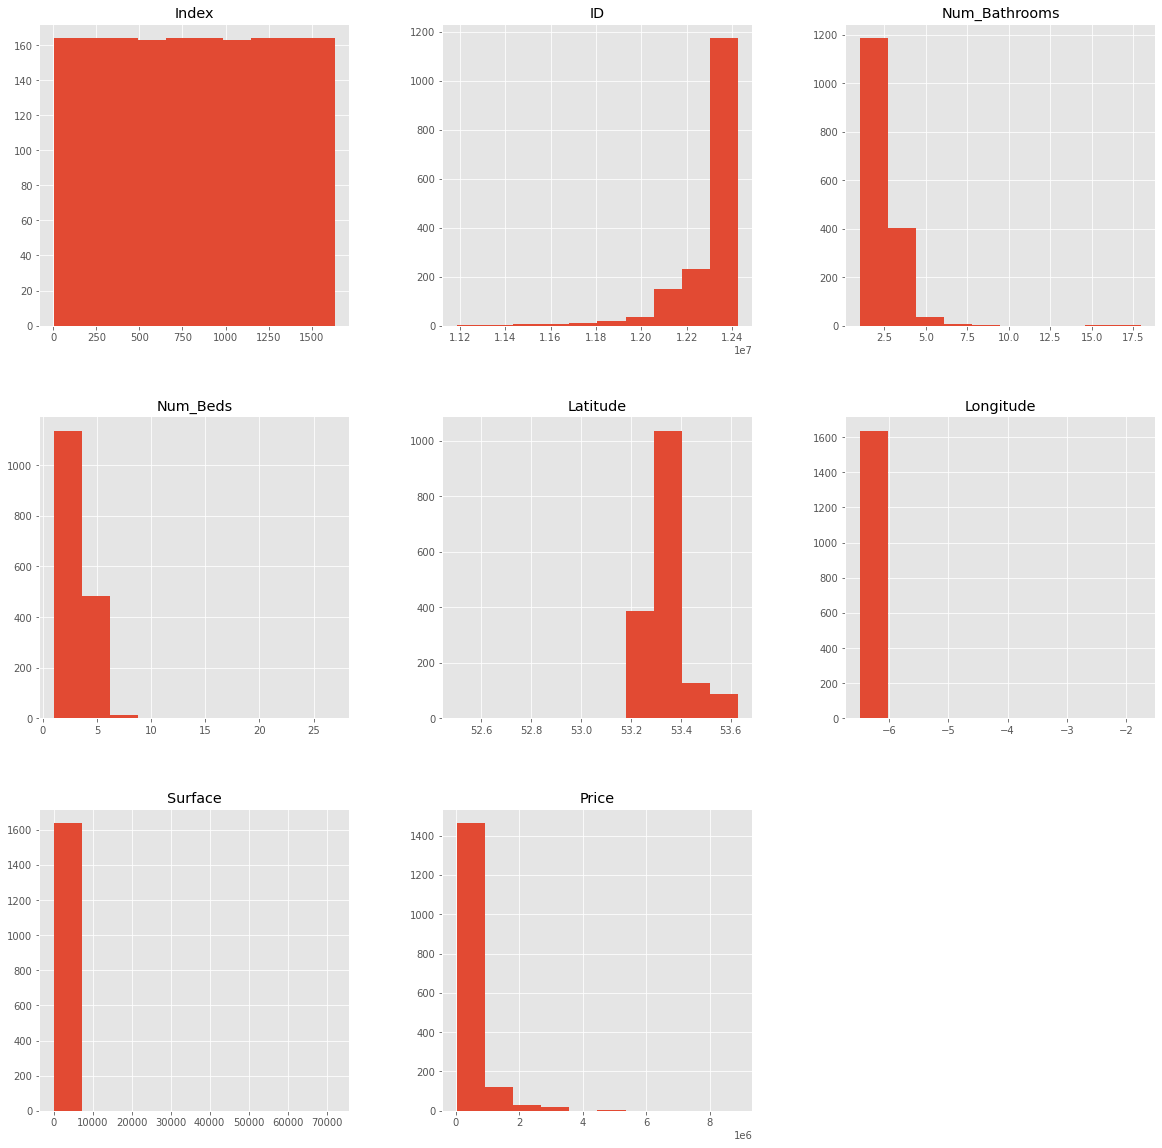

In [41]:
 dftrain.hist(figsize=[20,20]);

We will create a function to output a boxplot of the the numeric features

In [42]:
def boxplot_features(features):
    """
    box plot selected features
    
    :param features: list of features to be plotted
    :param plt: boxplot for each features
    """
    for f in features:
        plt.figure(figsize=(8,6), dpi= 100, facecolor='lightblue', edgecolor='k')
        sns.boxplot(x=dftrain[f], orient='v', width=0.2)
        plt.show()
        print(" ")
    return plt

In [43]:
# Get the data type for each column
dftrain.dtypes

Index              int64
ID                 int64
Location          object
Num_Bathrooms      int64
Num_Beds           int64
BER_class         object
Description       object
Services          object
Features          object
Latitude         float64
Longitude        float64
Type              object
Surface          float64
Price              int64
dtype: object

In [44]:
#Get list of numeric columns
numeric_columns = dftrain.select_dtypes(["int", "float"]).columns.tolist()
print(numeric_columns)

['Index', 'ID', 'Num_Bathrooms', 'Num_Beds', 'Latitude', 'Longitude', 'Surface', 'Price']


We will remove Latitude and Longitude as it is best to visualize them together.

In [45]:
numeric_columns.remove("Index")
numeric_columns.remove("ID")
numeric_columns.remove("Latitude")
numeric_columns.remove("Longitude")
print(numeric_columns)

['Num_Bathrooms', 'Num_Beds', 'Surface', 'Price']


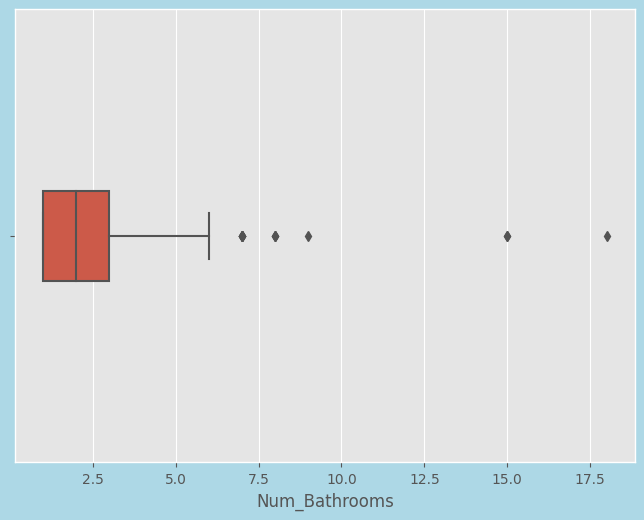

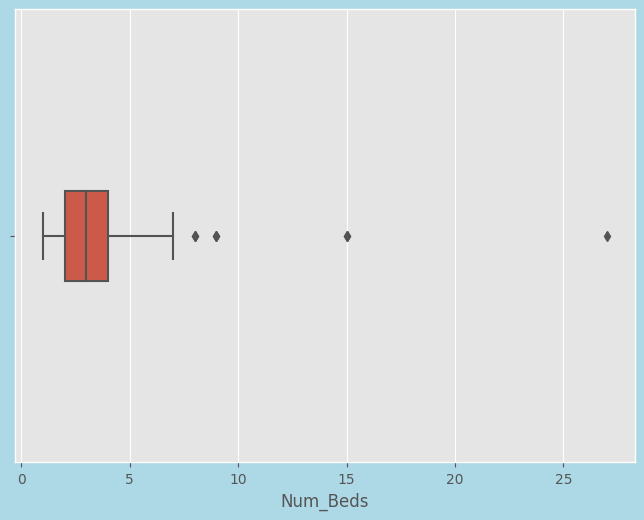

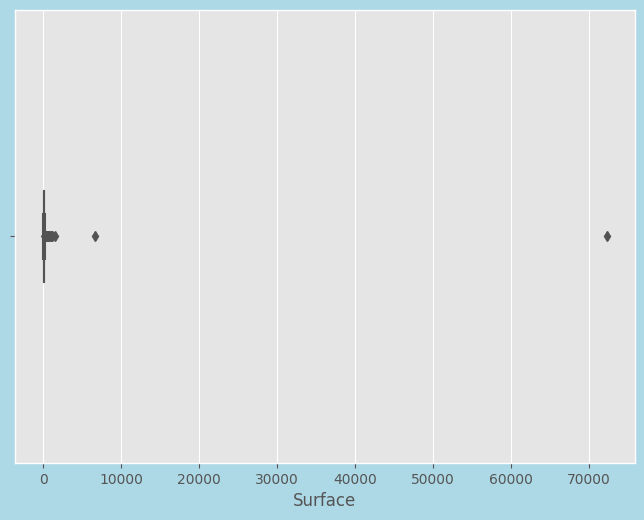

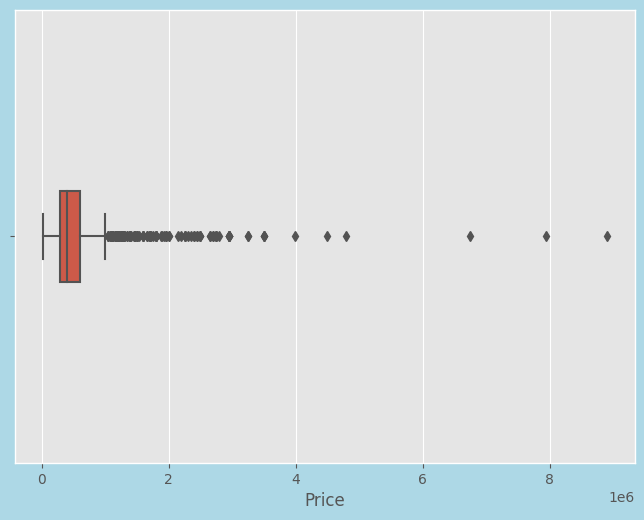

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [46]:
#Show boxplots of numeric values
boxplot_features(numeric_columns)

We see that we get a number of outliers for the numeric colums plotted. However this does not gives us much insight as there could be expensive and large house included in the dataset. We also see that we get a house that is larger than 70'000 m2 which cannot be possible so this should be removed. We will deep dive into these edge cases later but first lets prpoduce some scatter plots with lon/lat plus the other numeric values plotted vs prices which will provide better insight into the outliers present.

In [47]:
def scatterplot_features(features):
    """
    box plot selected features
    
    :param features: list of features to be plotted
    :param plt: boxplot for each features
    """
    for f in features:
        plt.figure(figsize=(8,6), dpi= 100, facecolor='lightblue', edgecolor='k')
        sns.scatterplot(data=dftrain, x=f[0], y=f[1], s=100, hue=f[2], marker="+")
        plt.show()
        print(" ")
    return plt

In [48]:
#Create combinations of features we want to compare
feature_combo = [["Latitude", "Longitude", "Price"], 
                 ["Surface", "Price", "Price"], 
                 ["Num_Bathrooms", "Price", "Price"], 
                 ["Num_Beds", "Price", "Price"], 
                 ["Num_Bathrooms", "Num_Beds", "Price"]]

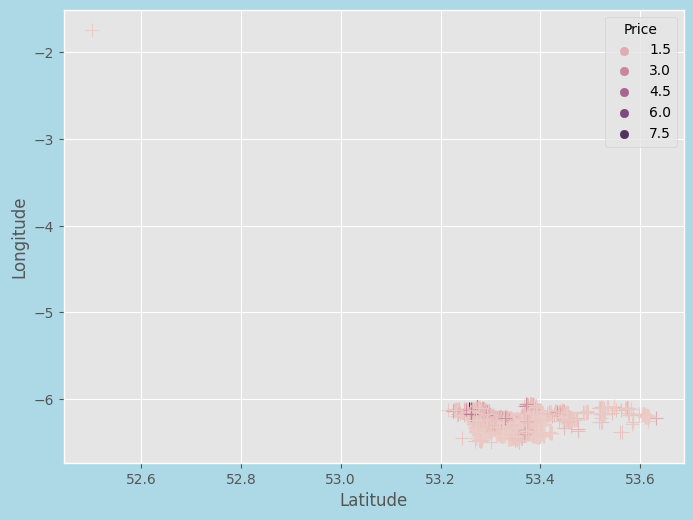

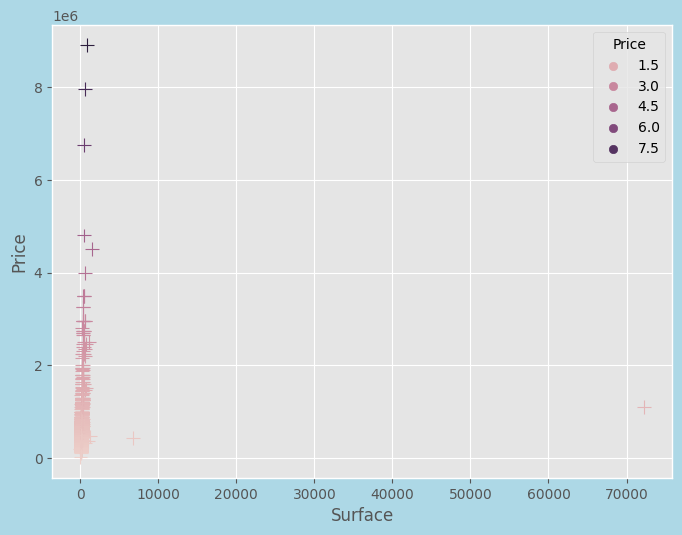

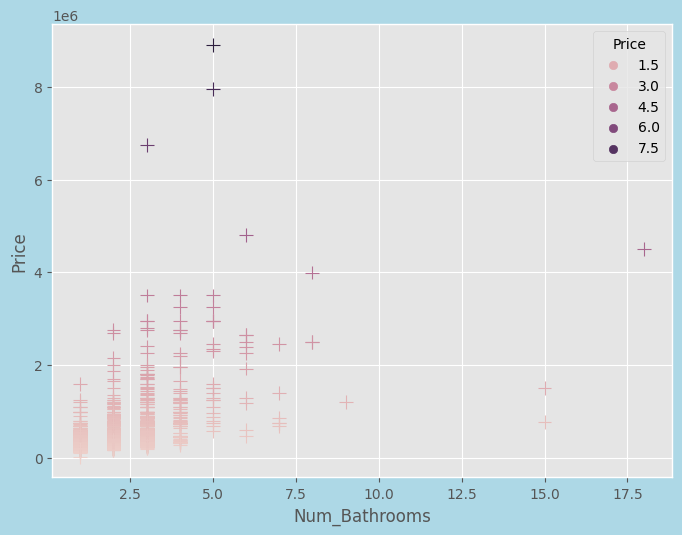

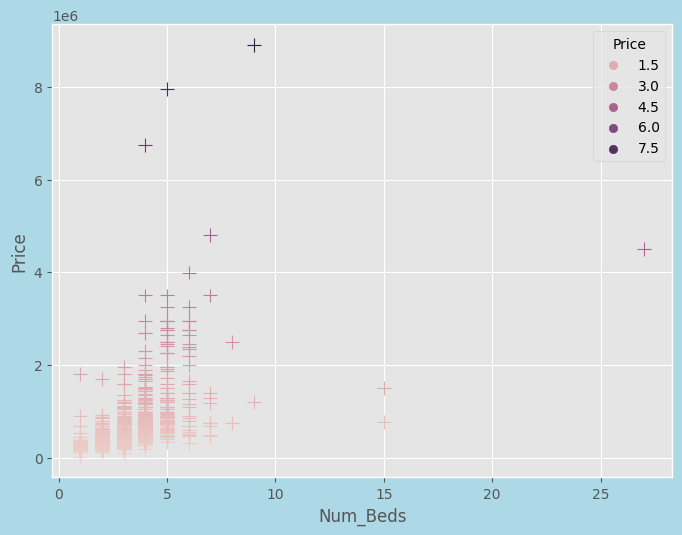

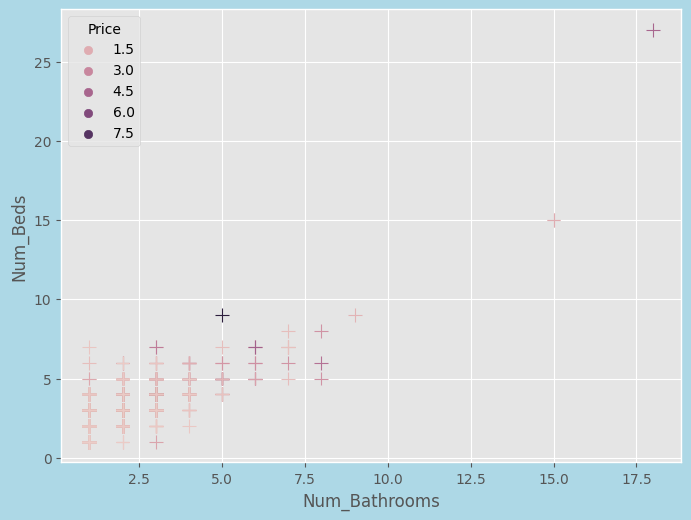

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [49]:
scatterplot_features(feature_combo)

We will apply a filter to isolate the outliers based on the plots

In [50]:
#Apply a filter to isolate outliers

#Longitude
longitude_filter = dftrain["Longitude"] > -5
#Surface
surface_filter = dftrain["Surface"] > 70000
#Bathrooms
bathroom_filter = dftrain["Num_Bathrooms"] > 10

outliers = dftrain[bathroom_filter 
                   | longitude_filter 
                   | surface_filter]
outliers.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
355,356,12270559,Clondalkin,1,3,NaN,RAY COOKE AUCTIONEERS take great pleasure in i...,NaN,None,52.501856,-1.744995,semi-detached,79.00000,199000
506,507,11675753,Swords,1,4,E1,Thornton Park is a superb modern equestrian ce...,NaN,None,53.474502,-6.343483,bungalow,72236.38714,1100000
557,558,12381836,Inchicore,15,15,D1,umber 67 &amp; 69 Jamestown Road represent a f...,Parking,18 separate units\nTransport links including t...,53.335109,-6.331515,semi-detached,318.20000,775000
1099,1100,11780612,Dun Laoghaire,15,15,NaN,A truly unique stone built house of great qual...,"Parking,Gas Fired Central Heating,Alarm,Wired ...",Lift servicing all floors\nVenetian and gothic...,53.287504,-6.146605,detached,700.00000,1500000
1378,1379,12085770,Killiney,18,27,NaN,The Grove is an imposing Victorian mansion bui...,NaN,Approx. 1 490 sq. m / 16 041 sq. ft. of accomm...,53.260955,-6.117266,detached,1490.00000,4500000


After investigating the outliers we whould remove these rows for the following reasons:

*   **355**: Coodinates show that the house is in the UK, not Clondalkin
*   **506**: This is an Equatrian centre
*   **557**: Not clear what this is, apparently there is 18 units what ever this is meaning its some sort of dormitory, maybe sort of student accomodation

We can alter the following feature instead of deleting it:

*   **1115**: Surface is worng by a factor of 100, must have been a typo. We can impute the correct value by dividing the value by 100



In [51]:
dftrain.loc[1115, "Surface"] = (dftrain.loc[1115, "Surface"] / 100)

In [52]:
drop_rows = [355, 506, 557]
dftrain.drop(index=drop_rows, inplace=True)

In [53]:
dftrain.shape

(1635, 14)

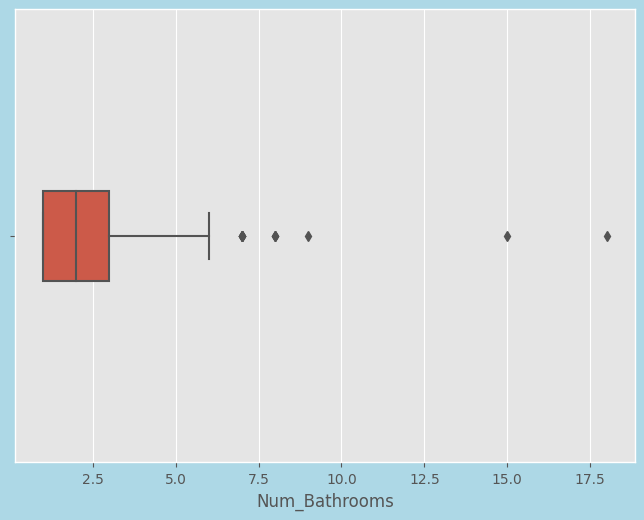

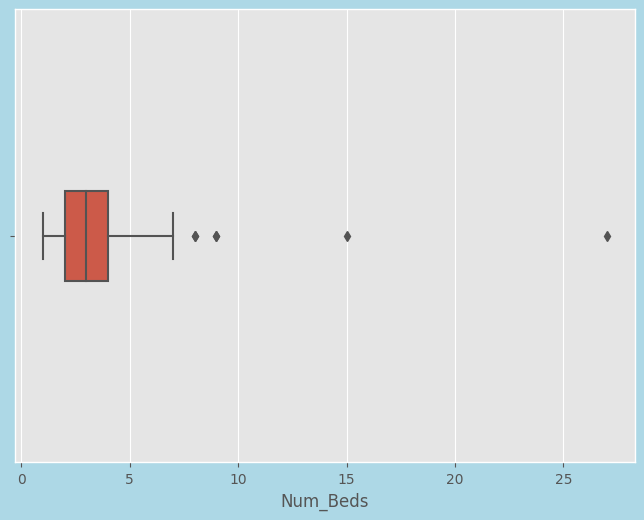

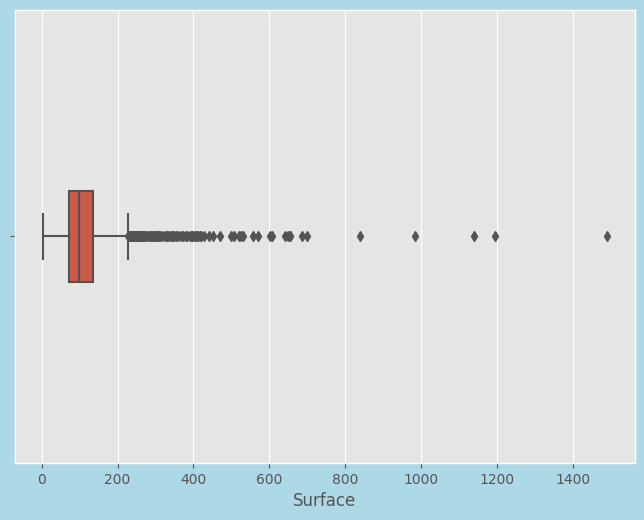

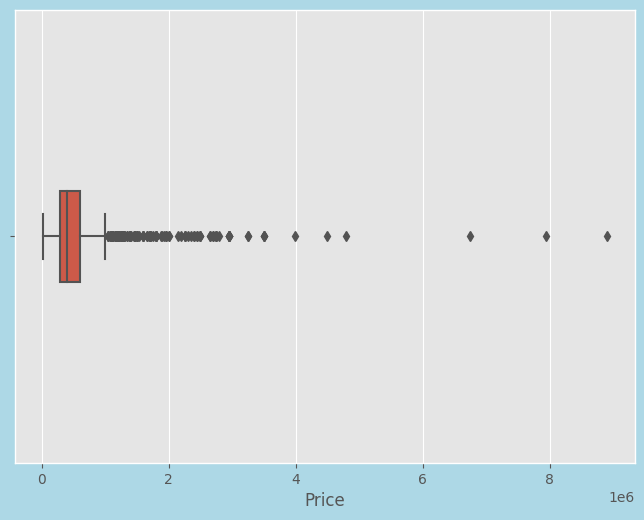

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [54]:
#Show boxplots of numeric values
boxplot_features(numeric_columns)

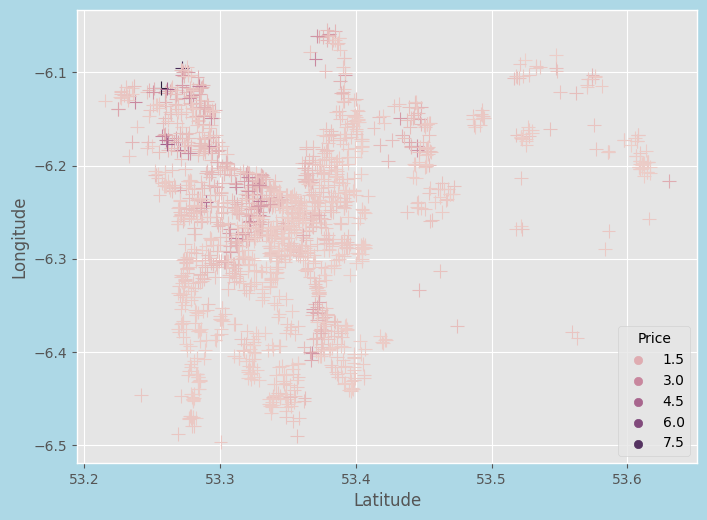

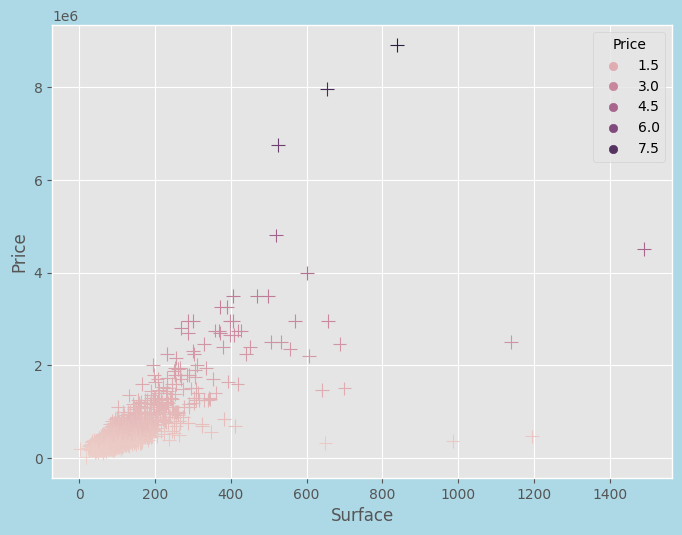

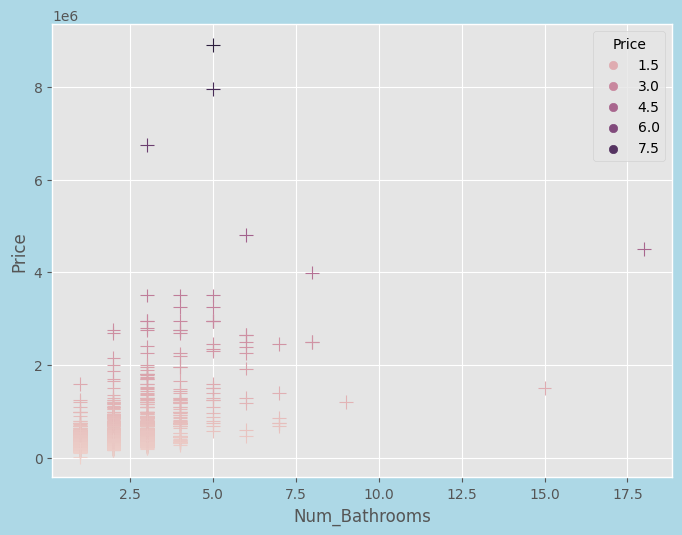

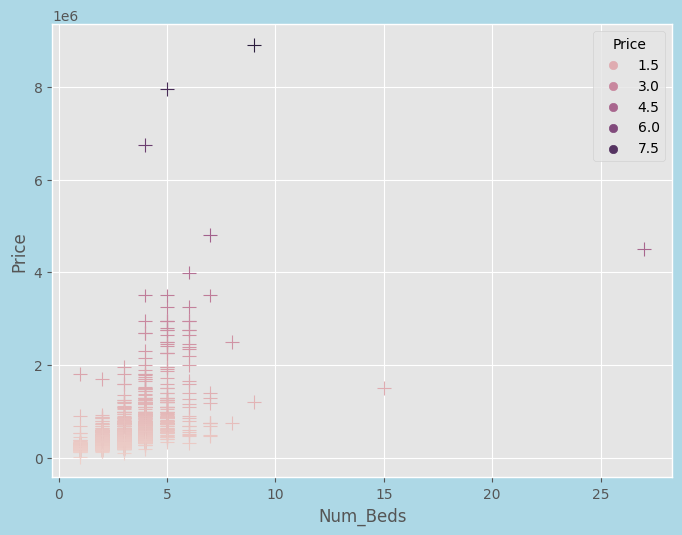

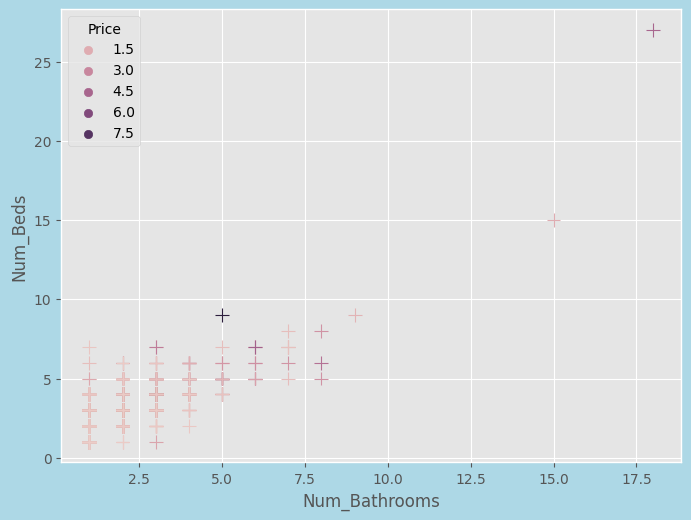

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [55]:
#Show scatterplots of numeric values
scatterplot_features(feature_combo)

We still see a number of outliers present to we will remove outliers that are outside 3 standard deviations from the mean

In [56]:
def std_method(df,column):
    """Replaces outliers outside of 3 standard deviations from the mean for Gaussian-like distributions
    
    param df: entire bank dataframe
    param df: column in the dataframe that we want to process
    """
    
    data_mean, data_std = mean(df[column]), np.std(df[column])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    lower = math.floor(lower) 
    upper = math.ceil(upper)
    outliers = [x for x in df[column] if x < lower or x > upper]
    print('Outliers removed: %d' % len(outliers))
    print(outliers)
    print(upper)

    df = df[df[column] < upper]
    
    return df

In [57]:
dftrain = std_method(dftrain,'Num_Beds')

Outliers removed: 4
[9, 9, 15, 27]
8


In [58]:
dftrain = std_method(dftrain,'Num_Bathrooms')

Outliers removed: 7
[7, 8, 8, 7, 7, 7, 7]
6


In [59]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 1637
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          1611 non-null   int64  
 1   ID             1611 non-null   int64  
 2   Location       1611 non-null   object 
 3   Num_Bathrooms  1611 non-null   int64  
 4   Num_Beds       1611 non-null   int64  
 5   BER_class      1368 non-null   object 
 6   Description    1611 non-null   object 
 7   Services       573 non-null    object 
 8   Features       1106 non-null   object 
 9   Latitude       1611 non-null   float64
 10  Longitude      1611 non-null   float64
 11  Type           1611 non-null   object 
 12  Surface        1611 non-null   float64
 13  Price          1611 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 188.8+ KB


# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

For the NLP example, I only used description and features as these were the only two suitable columns for this process. For the NLP process I did the following steps:

* Removed all non-word values using regular expressions
* Removed punctuation using regular expressions
*	Set all characters to lower case
*	Removed words that where less than 4 characters and stop words such as “the” and “it” etc.
*	Vectorize the description and features (Medium, 2020b)


## Pre-Processing

In [60]:
# Removing stopwords and stemming
# a stem must be a word
# Example:  fishing, fished, and fisher: stem -> fish
# choose English as the target language
stemmer = SnowballStemmer('english', ignore_stopwords=False)

In [61]:
# Stop words are basically a set of commonly used words in any language
# https://en.wikipedia.org/wiki/Stop_word
# and are filtered out before processing of natural language data 
# Example list: https://github.com/igorbrigadir/stopwords/blob/master/en/terrier.txt
nltk.download('stopwords')

swords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [62]:
# Make copies of the data
dftrain_nlp = dftrain
dftest_nlp = dftest

In [63]:
dftrain_nlp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 1637
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          1611 non-null   int64  
 1   ID             1611 non-null   int64  
 2   Location       1611 non-null   object 
 3   Num_Bathrooms  1611 non-null   int64  
 4   Num_Beds       1611 non-null   int64  
 5   BER_class      1368 non-null   object 
 6   Description    1611 non-null   object 
 7   Services       573 non-null    object 
 8   Features       1106 non-null   object 
 9   Latitude       1611 non-null   float64
 10  Longitude      1611 non-null   float64
 11  Type           1611 non-null   object 
 12  Surface        1611 non-null   float64
 13  Price          1611 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 188.8+ KB


In [64]:
#Leave Descripstions and Features
dftrain_nlp = dftrain_nlp[['Description', 'Features', 'Price']]
dftest_nlp = dftest_nlp[['Description', 'Features']]

In [65]:
#Drop NaN rows
dftrain_nlp.dropna(subset=["Features"],inplace=True)
dftest_nlp.dropna(subset=["Features"],inplace=True)

In [66]:
#Clean data using regular expressions - remove everything except letters and numbers
dftrain_nlp['Description'] = dftrain_nlp['Description'].str.replace("[^a-zA-Z#]", " ")
dftest_nlp['Features'] = dftest_nlp['Features'].str.replace("[^a-zA-Z#]", " ")

In [67]:
p = re.compile(r'[^\w\s]+')

In [68]:
dftrain_nlp['Description'] = [p.sub('', x) for x in dftrain_nlp['Description'].tolist()]
dftrain_nlp['Features'] = [p.sub('', x) for x in dftrain_nlp['Features'].tolist()]

In [69]:
dftest_nlp['Description'] = [p.sub('', x) for x in dftest_nlp['Description'].tolist()]
dftest_nlp['Features'] = [p.sub('', x) for x in dftest_nlp['Features'].tolist()]

In [70]:
#Set string to lowercase
dftrain_nlp['Description'] = dftrain_nlp['Description'].str.lower()
dftrain_nlp['Features'] = dftrain_nlp['Features'].str.lower()

dftest_nlp['Description'] = dftest_nlp['Description'].str.lower()
dftest_nlp['Features'] = dftest_nlp['Features'].str.lower()

In [71]:
dftrain_nlp.head(5)

,Description,Features,Price
1,northbrook terrace is a charming red brick ...,bight and spacious interior\nnumerous original...,425000
2,welcome to no cotter close an immaculately...,special features\nlarge rear garden\ngenerous ...,535000
3,welcome to sycamore walk enjoying a premi...,wonderful 3 bed detached bungalow \naccomm...,499000
4,four seasons comes to the market as a wonder...,detached property \ndouble glazed windows...,510000
6,marlborough court is a bright and spacious t...,first floor purpose built apartment\ncul de sa...,300000


In [72]:
dftrain_nlp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 1 to 1637
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  1106 non-null   object
 1   Features     1106 non-null   object
 2   Price        1106 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.6+ KB


In [73]:
#Clean data using regular expressions - remove words less than 4 charaters
short_word = 4
dftrain_nlp['Description'] = dftrain_nlp['Description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))
dftrain_nlp['Features'] = dftrain_nlp['Features'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))

In [74]:
# Remove Stop Words
stop_words = set(stopwords.words('english'))
dftrain_nlp['Description'] = dftrain_nlp['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
dftrain_nlp['Features'] = dftrain_nlp['Features'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [75]:
#Clean data using regular expressions - remove words less than 4 charaters
short_word = 4
dftest_nlp['Description'] = dftest_nlp['Description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))
dftest_nlp['Features'] = dftest_nlp['Features'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))

In [76]:
# Remove Stop Words
stop_words = set(stopwords.words('english'))
dftest_nlp['Description'] = dftest_nlp['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
dftest_nlp['Features'] = dftest_nlp['Features'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [77]:
dftrain_nlp.head(5)

,Description,Features,Price
1,northbrook terrace charming brick period seclu...,bight spacious interior numerous original feat...,425000
2,welcome cotter close immaculately presented th...,special features large garden generous street ...,535000
3,welcome sycamore enjoying premier address smal...,wonderful detached bungalow accommodation exte...,499000
4,seasons comes market wonderful opportunity see...,detached property double glazed windows double...,510000
6,marlborough court bright spacious bedroom firs...,first floor purpose built apartment setting de...,300000


In [78]:
dftest_nlp.head(5)

,Description,Features
0,estate agents delighted present townhouse situ...,designated parking spaces presented pristine c...
1,welcome saint anthony no214 glasnevin avenue s...,modern worcester boiler single glazed windows ...
2,located popular grounds approximately 008ha ki...,bedroom detached house fired central heating s...
3,delighted represent impeccable tyler owens des...,detached house south facing garden street park...
4,unique opportunity acquire brick bedroom prope...,brick terrace property facing garden garage la...


We can see the visible impact of the data cleansing exercise which has removed short words, stop words and punctuations.

In [79]:
# Split into X & y data
X_train = dftrain_nlp.drop('Price', axis = 1)
y_train = dftrain_nlp['Price']
X_test = dftest_nlp

len(X_train), len(y_train), len(X_test)

(1106, 1106, 702)

In [80]:
desc_column = "Description"
feat_column = "Features"

In [81]:
#Vectorize Description: Train & Test
vectoriser_desc = TfidfVectorizer(stop_words='english', max_features= 300, max_df=0.5, smooth_idf=True)

vectoriser_desc = vectoriser_desc.fit(X_train[desc_column])
tfidf_train_desc = vectoriser_desc.transform(X_train[desc_column])
tfidf_test_desc = vectoriser_desc.transform(X_test[desc_column])

tfidf_train_desc.shape, tfidf_test_desc.shape

((1106, 300), (702, 300))

In [82]:
#Vectorize Features: Train & Test
vectoriser_desc = TfidfVectorizer(stop_words='english', max_features= 300, max_df=0.5, smooth_idf=True)

vectoriser_desc = vectoriser_desc.fit(X_train[feat_column])
tfidf_train_feat = vectoriser_desc.transform(X_train[feat_column])
tfidf_test_feat = vectoriser_desc.transform(X_test[feat_column])

tfidf_train_feat.shape, tfidf_test_feat.shape

((1106, 300), (702, 300))

In [83]:
#Combine Train Description & Features
train_data = np.c_[dftrain_nlp.values, tfidf_train_desc.toarray(), tfidf_train_feat.toarray()]
#Combine Test Description & Features
test_data = np.c_[dftest_nlp.values, tfidf_test_desc.toarray(), tfidf_test_feat.toarray()]

In [84]:
train_data.shape, test_data.shape

((1106, 603), (702, 602))

We are now left with the vectorized dat which can be further processed to estiamte the price and/or create new features for the other models.

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

For the Piecewise and the Bayesian NN, I completed some additional pre-processing which was suitable for both models. I removed location as the Longitude and Latitude where better predictors based on the XGBoost feature importance (Brownlee, 2016). I also removed the Type after it was one hot encoded because the new features did provide much benefit. This left we me with the following features:

* Surface
*	Longitude
*	Latitude
*	BER_Class
*	Num_Bathrooms
*	Num_Beds


In [85]:
# Make copies of the data
dftrain_pr = dftrain
dftest_pr = dftest

In [86]:
dftrain_pr.shape

(1611, 14)

In [87]:
dftest_pr.shape

(702, 13)

Firstly we will remove columns with high amounts of missing data or which do not offer any value such as services so we will drop that column.

In [88]:
#Drop Index, ID, and Services
dftrain_pr.drop(columns="Services",inplace=True)
dftest_pr.drop(columns="Services",inplace=True)

dftrain_pr.drop(columns="Index",inplace=True)
dftest_pr.drop(columns="Index",inplace=True)

dftrain_pr.drop(columns="ID",inplace=True)
dftest_pr.drop(columns="ID",inplace=True)

In [89]:
dftrain_pr.shape

(1611, 11)

In [90]:
dftest_pr.shape

(702, 10)

In [91]:
dftrain_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 1637
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       1611 non-null   object 
 1   Num_Bathrooms  1611 non-null   int64  
 2   Num_Beds       1611 non-null   int64  
 3   BER_class      1368 non-null   object 
 4   Description    1611 non-null   object 
 5   Features       1106 non-null   object 
 6   Latitude       1611 non-null   float64
 7   Longitude      1611 non-null   float64
 8   Type           1611 non-null   object 
 9   Surface        1611 non-null   float64
 10  Price          1611 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 151.0+ KB


We will drop any rows with NaN for BER.

In [92]:
dftrain_pr.dropna(subset=["BER_class"], inplace=True)

In [93]:
dftrain_pr.shape

(1368, 11)

Encoding location using mapper.

In [94]:
#Get unique values for Location in training set
dftrain_pr["Location"].nunique()

137

In [95]:
#Get unique values for Location in test set
dftest_pr["Location"].nunique()

129

In [96]:
labels = dftrain_pr['Location'].astype('category').cat.categories.tolist()
replace_map_comp_1 = {'Location' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
dftrain_pr.replace(replace_map_comp_1, inplace=True)

In [97]:
labels = dftest_pr['Location'].astype('category').cat.categories.tolist()
replace_map_comp_1 = {'Location' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
dftest_pr.replace(replace_map_comp_1, inplace=True)

In [99]:
# create object of Ordinalencoding
encoder = ce.OrdinalEncoder(cols=['BER_class'],return_df=True, mapping=[{'col':'BER_class', 
                                                                     'mapping':{'A1':0,
                                                                                'A2':1,
                                                                                'A3':2,
                                                                                'B1':3,
                                                                                'B2':4,
                                                                                'B3':5,
                                                                                'C1':6,
                                                                                'C2':7,
                                                                                'C3':8,
                                                                                'D1':9,
                                                                                'D2':10,
                                                                                'E1':11,
                                                                                'E2':12,
                                                                                'F':13,
                                                                                'G':14,
                                                                                'SINo666of2006exempt':15}}])

In [100]:
#fit and transform train & test data 
dftrain_pr = encoder.fit_transform(dftrain_pr)
dftest_pr = encoder.fit_transform(dftest_pr)

In [101]:
dftrain_pr.shape

(1368, 11)

In [102]:
dftest_pr.shape

(702, 10)

We will one hot encode property type.

In [103]:
# One Hot Encoding
dftrain_pr = pd.get_dummies(dftrain_pr, columns = ["Type"])
dftest_pr = pd.get_dummies(dftest_pr, columns = ["Type"])

In [104]:
dftrain_pr.shape

(1368, 20)

In [105]:
dftest_pr.shape

(702, 18)

In [106]:
dftrain_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368 entries, 0 to 1637
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location             1368 non-null   int64  
 1   Num_Bathrooms        1368 non-null   int64  
 2   Num_Beds             1368 non-null   int64  
 3   BER_class            1368 non-null   int64  
 4   Description          1368 non-null   object 
 5   Features             987 non-null    object 
 6   Latitude             1368 non-null   float64
 7   Longitude            1368 non-null   float64
 8   Surface              1368 non-null   float64
 9   Price                1368 non-null   int64  
 10  Type_apartment       1368 non-null   uint8  
 11  Type_bungalow        1368 non-null   uint8  
 12  Type_detached        1368 non-null   uint8  
 13  Type_duplex          1368 non-null   uint8  
 14  Type_end-of-terrace  1368 non-null   uint8  
 15  Type_semi-detached   1368 non-null   u

In [107]:
dftest_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location             702 non-null    int64  
 1   Num_Bathrooms        702 non-null    int64  
 2   Num_Beds             702 non-null    int64  
 3   BER_class            702 non-null    float64
 4   Description          702 non-null    object 
 5   Features             702 non-null    object 
 6   Latitude             702 non-null    float64
 7   Longitude            702 non-null    float64
 8   Surface              702 non-null    float64
 9   Type_apartment       702 non-null    uint8  
 10  Type_bungalow        702 non-null    uint8  
 11  Type_detached        702 non-null    uint8  
 12  Type_duplex          702 non-null    uint8  
 13  Type_end-of-terrace  702 non-null    uint8  
 14  Type_semi-detached   702 non-null    uint8  
 15  Type_site            702 non-null    uin

In [108]:
columns = []
for col in dftrain_pr.columns:
    columns.append(col)

columns.remove("Price")
columns.append("Price")

dftrain_pr = dftrain_pr[columns]

dftrain_pr.head(5)

,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Surface,Type_apartment,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse,Price
0,98,2,2,8,DNG are delighted to present to the market no....,None,53.396659,-6.438791,67.00,1,0,0,0,0,0,0,0,0,0,195000
1,96,1,2,9,13 Northbrook Terrace is a charming red brick ...,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,95.97,0,0,0,0,0,0,0,0,1,0,425000
2,124,3,3,2,"Welcome to No. 6 Cotter Close, an immaculately...",Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,107.00,0,0,0,0,0,1,0,0,0,0,535000
3,22,1,3,11,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,81.00,0,0,1,0,0,0,0,0,0,0,499000
4,85,3,4,9,'Four Seasons' comes to the market as a wonder...,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,153.00,0,0,1,0,0,0,0,0,0,0,510000


In [109]:
dftrain_pr.drop(columns="Type_studio", inplace=True)

In [110]:
dftrain_pr.shape

(1368, 19)

Before we execute our basic model to get us started, we will look investigate the most important features using XGBoost. 

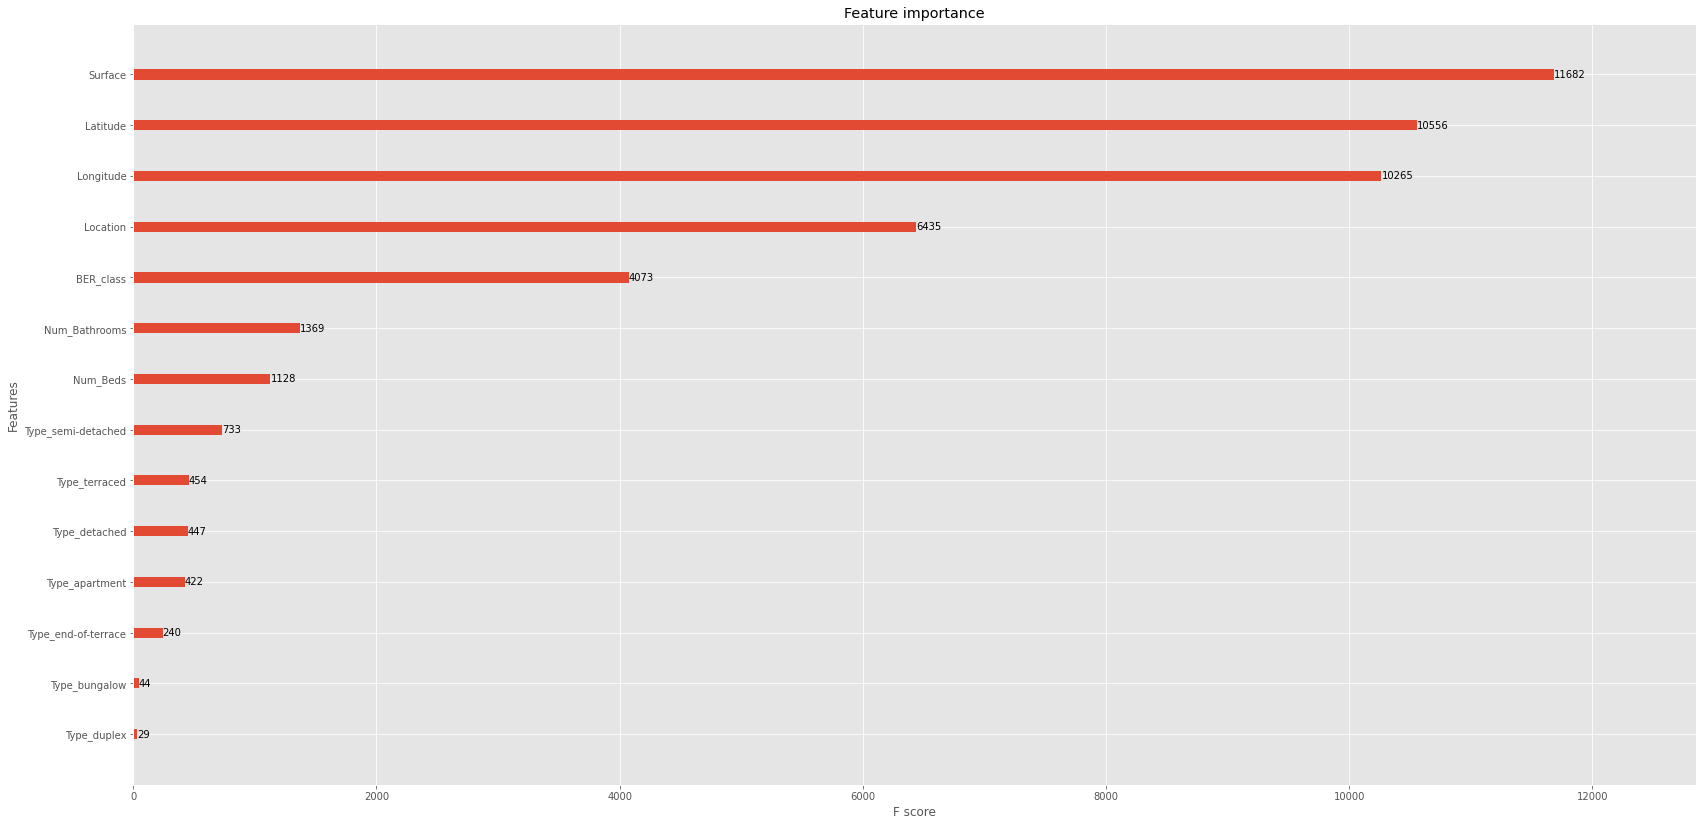

In [111]:
#Remove Categorical Variables
dftrain_pr_xgb = dftrain_pr.drop(['Description', 'Features'], axis=1)

# For train/test split
X = dftrain_pr_xgb.drop('Price',axis=1)
y = dftrain_pr_xgb['Price']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
fi_Model = XGBClassifier()
fi_Model.fit(X_train, y_train)

# plot feature importance
plt.rcParams["figure.figsize"] = (28, 14)
plot_importance(fi_Model)
plt.show();

Based on the above analysis, I am going to remove the everything except:


*   Longitude
*   latitude
*   BER Class
*   Num Bathrooms
*   Num Beds

Location is coming up with high importance but Longitude and latitude cover this factor better based on the scores. I may add back in the property types depending on the performance.









## Baseline Model

Similar to Etivity2 we will implement a baseline model to get started

In [112]:
#Set features
train_features = ['Surface','Latitude','Longitude','BER_class','Num_Beds','Num_Bathrooms', 'Price']
test_features = ['Surface','Latitude','Longitude','BER_class','Num_Beds','Num_Bathrooms']

#Select training subset
df_subset_train = dftrain_pr[train_features].dropna(axis=0)

#Select test subset
df_subset_test = dftest_pr[test_features].dropna(axis=0)

In [113]:
print('Number of nan in df_subset_train dataset: ',df_subset_train.isnull().sum().sum())
print('Number of nan in df_subset_test dataset: ',df_subset_test.isnull().sum().sum())

Number of nan in df_subset_train dataset:  0
Number of nan in df_subset_test dataset:  0


We will split the training data to create a validation set in order to train the model.

In [115]:
y = df_subset_train['Price'].values
X = df_subset_train.drop(['Price'], axis=1).values

X_test = df_subset_test.values

# training: 70% (0.7), test: 30% (0.3) 
Xs_train,Xs_test,ys_train,ys_test = train_test_split(X, y, test_size=0.3)

In [116]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

Xss_kaggle_test = np.hstack([X_test,X_test[:,[2]]**2])
Xn_kaggle_test = xscaler.transform(Xss_kaggle_test)

ylog = np.log(ys_train.reshape(-1, 1).astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

In [117]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 871.09


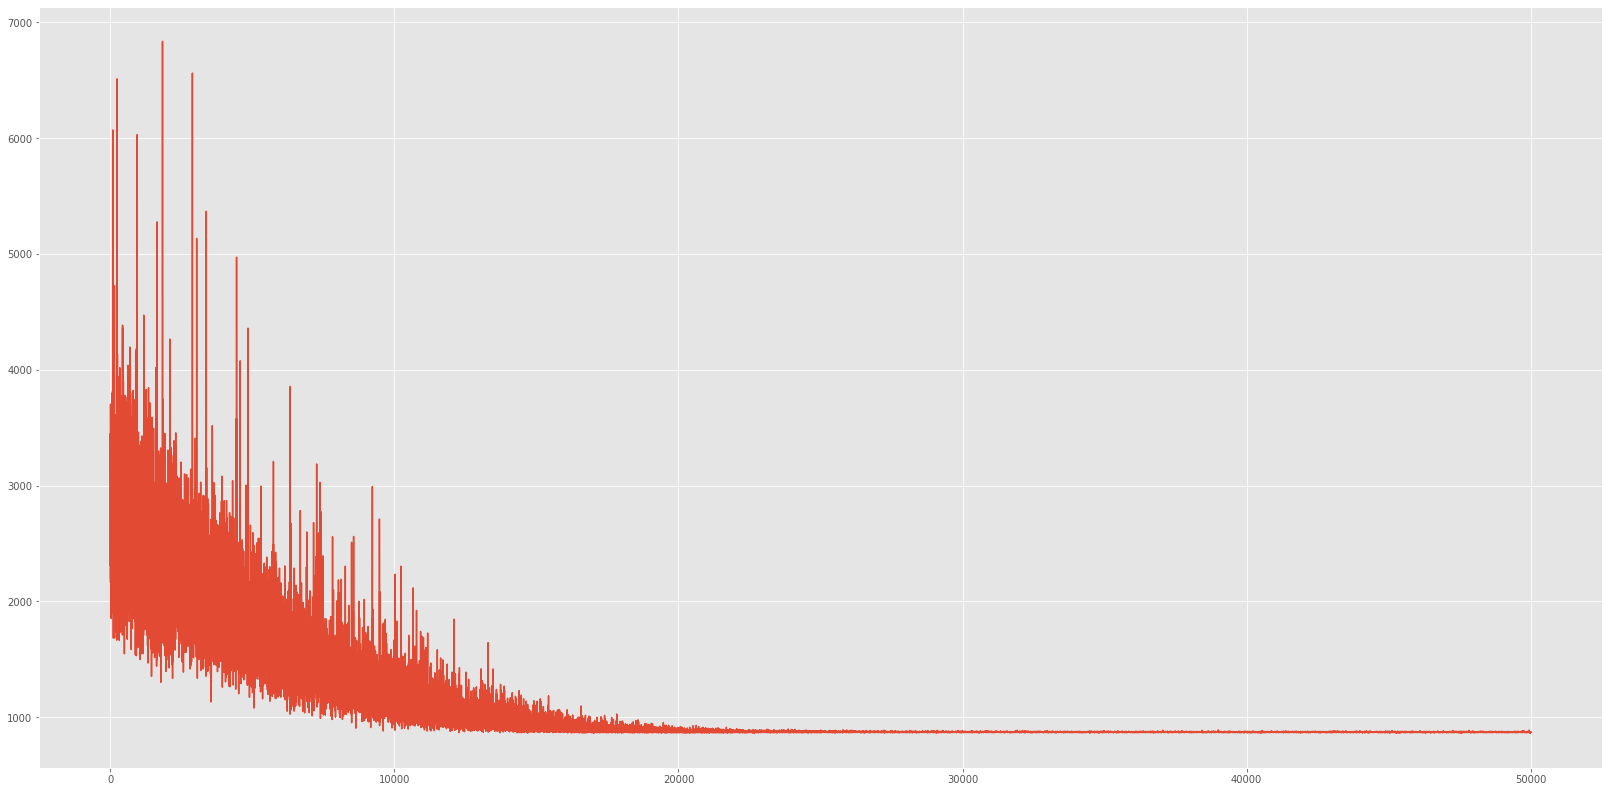

In [118]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [119]:
# samples from the posterior
posterior = approximation.sample(5000)

In [120]:
rf_reg = rfr(n_estimators=4,criterion="mse",n_jobs=-1,random_state=rand_state) # criterion=absolute_error
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=4, n_jobs=-1, oob_score=False,
                      random_state=11, verbose=0, warm_start=False)

In [121]:
def rmsle(y_predicted, y_actual):
  """
  Function to calculate the root mean squared log error(RMSLE)
  Returns RMSLE
  """
  return np.sqrt(mean_squared_error((np.log(y_predicted)+1),(np.log(y_actual)+1) ) )

In [122]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - ys_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - ys_test) / ys_test)))
print("RMSLE on the validation data = ",(rmsle(y_pred_BLR,ys_test)))

MAE =  125622.04184001988
MAPE =  0.22544608710772468
RMSLE on the validation data =  0.28720270879041515


In [123]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_kaggle_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]

In [124]:
# Save prediction to file
basic_results = pd.DataFrame(y_pred_BLR, columns=['Price'])
baseline_model = pd.concat([index, basic_results], axis=1)
baseline_model.to_csv(os.path.join("/content/drive/MyDrive/Colab Notebooks/ET5003_Kaggle_Comp/", "baseline_model.csv"),index=False)

## Piecewise Regression

### Select longitude and latitude to create clusters

#### Clustering

##### Full Model

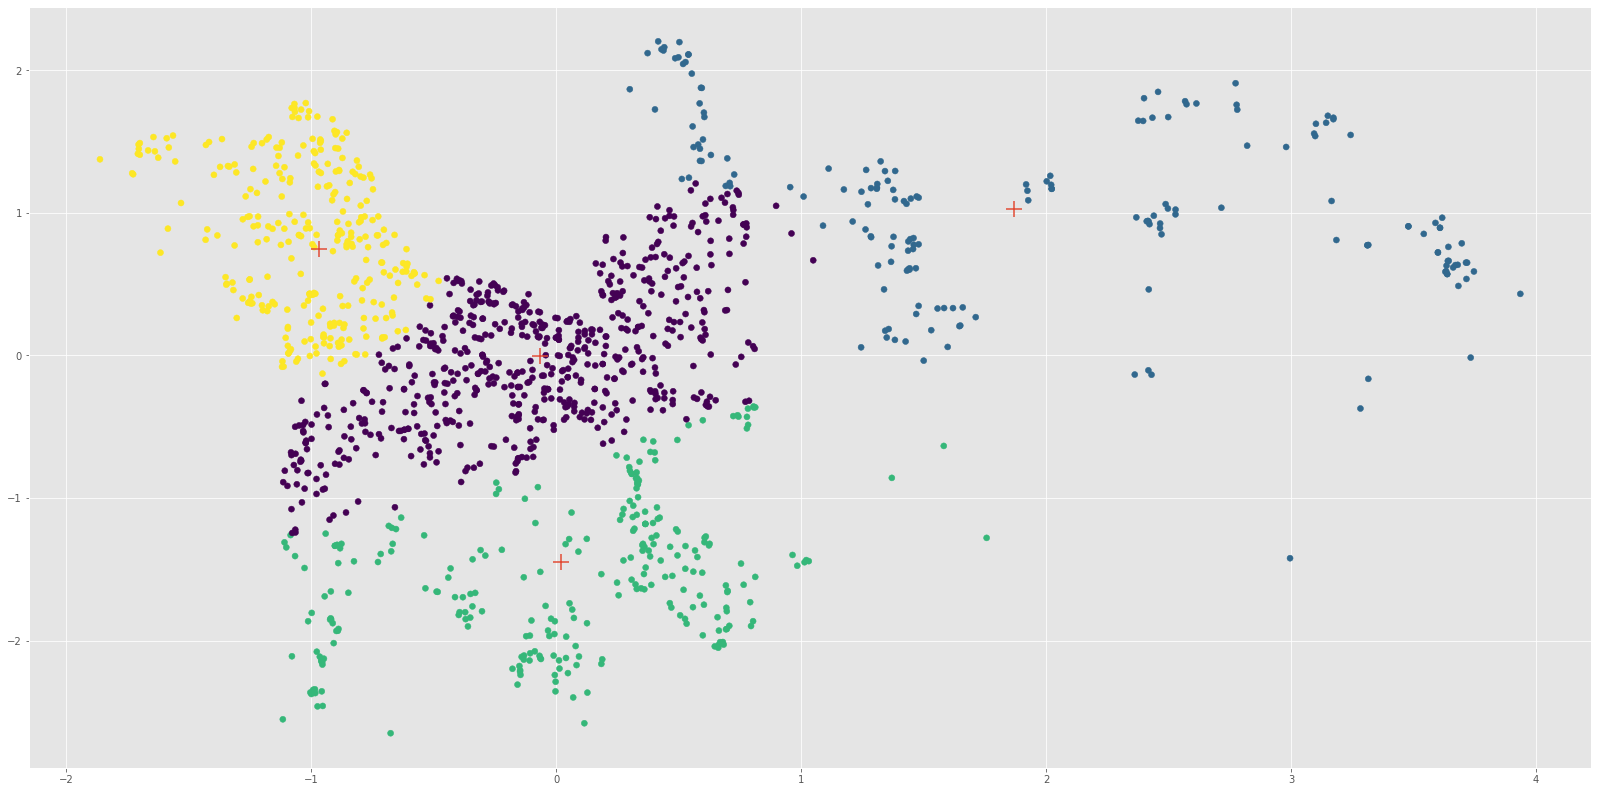

In [125]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)

ind=[1,2]

X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)

# plot blue dots
labels = gmm.fit_predict(X_ind)
plt.scatter(X_ind[:,0],X_ind[:,1], c=labels)
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1],marker='+',s=250)

### Clusters

In [126]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 446, 1: 119, 2: 191, 3: 201}

In [127]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 185, 1: 62, 2: 73, 3: 91}

In [128]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]
ylog0 = np.log(ys_train.reshape(-1, 1).astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [129]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.reshape(-1, 1).astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [130]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.reshape(-1, 1).astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [131]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.reshape(-1, 1).astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [132]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])
    
with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 449.89


In [133]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 135.22


In [134]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 179.13


In [135]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 204.34


In [136]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

### Simulations

Cluster 0

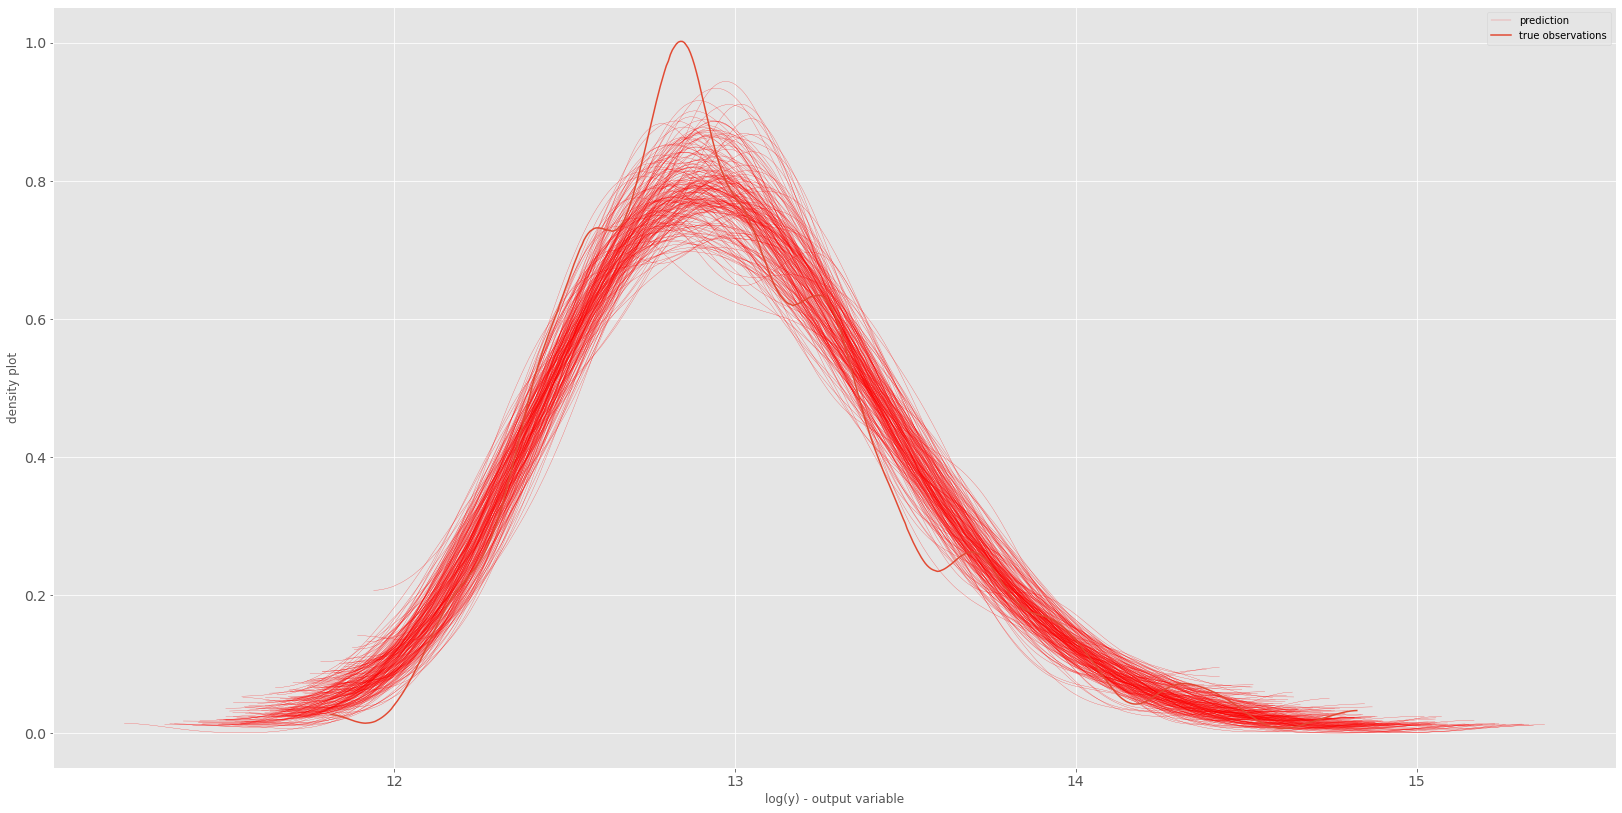

In [137]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Cluster 1

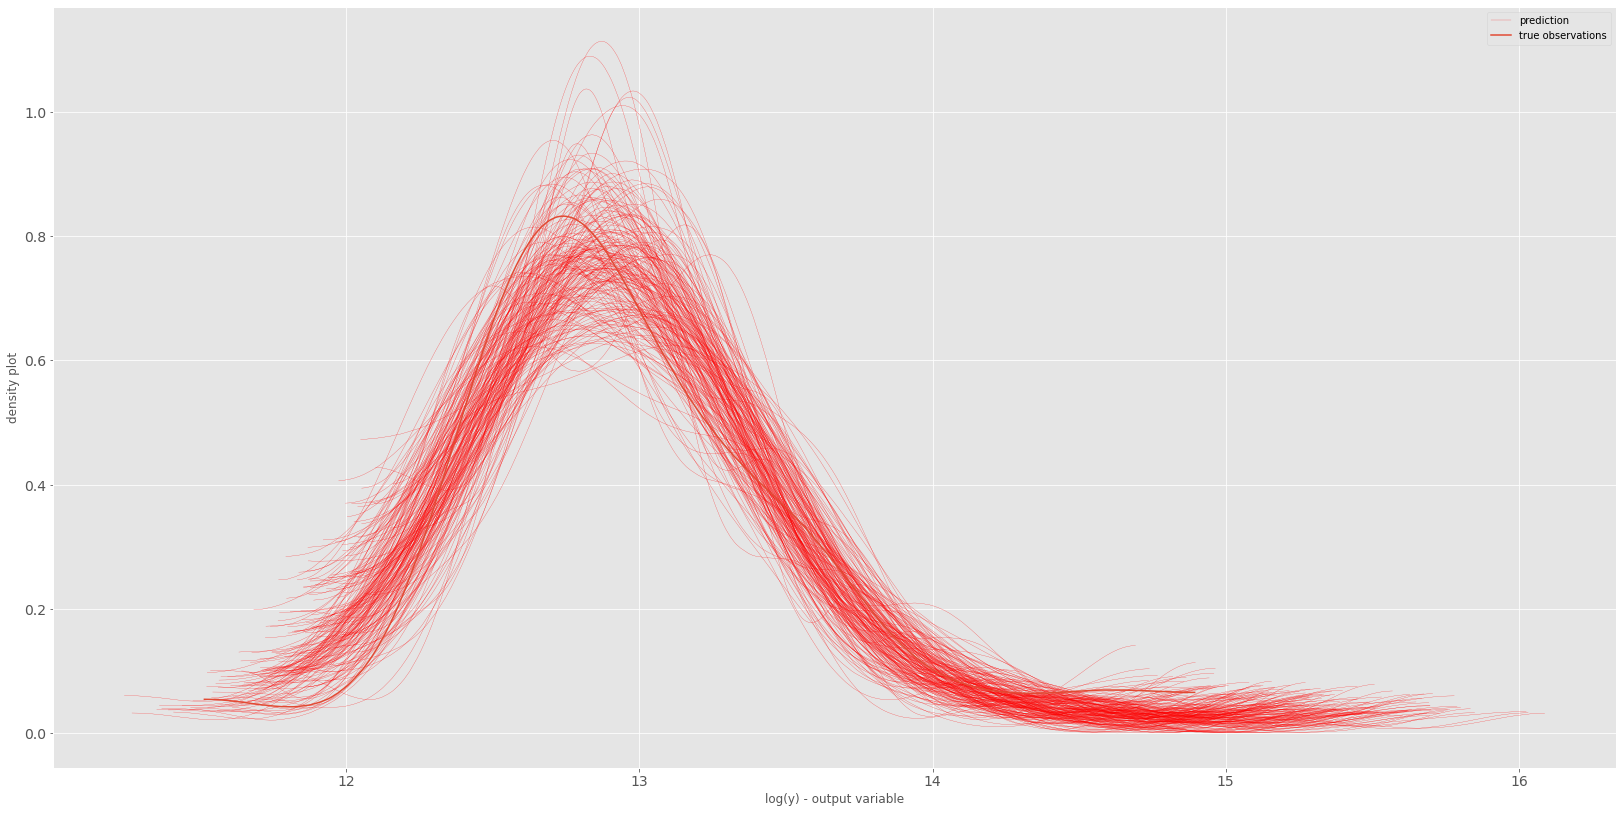

In [138]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Cluster 2

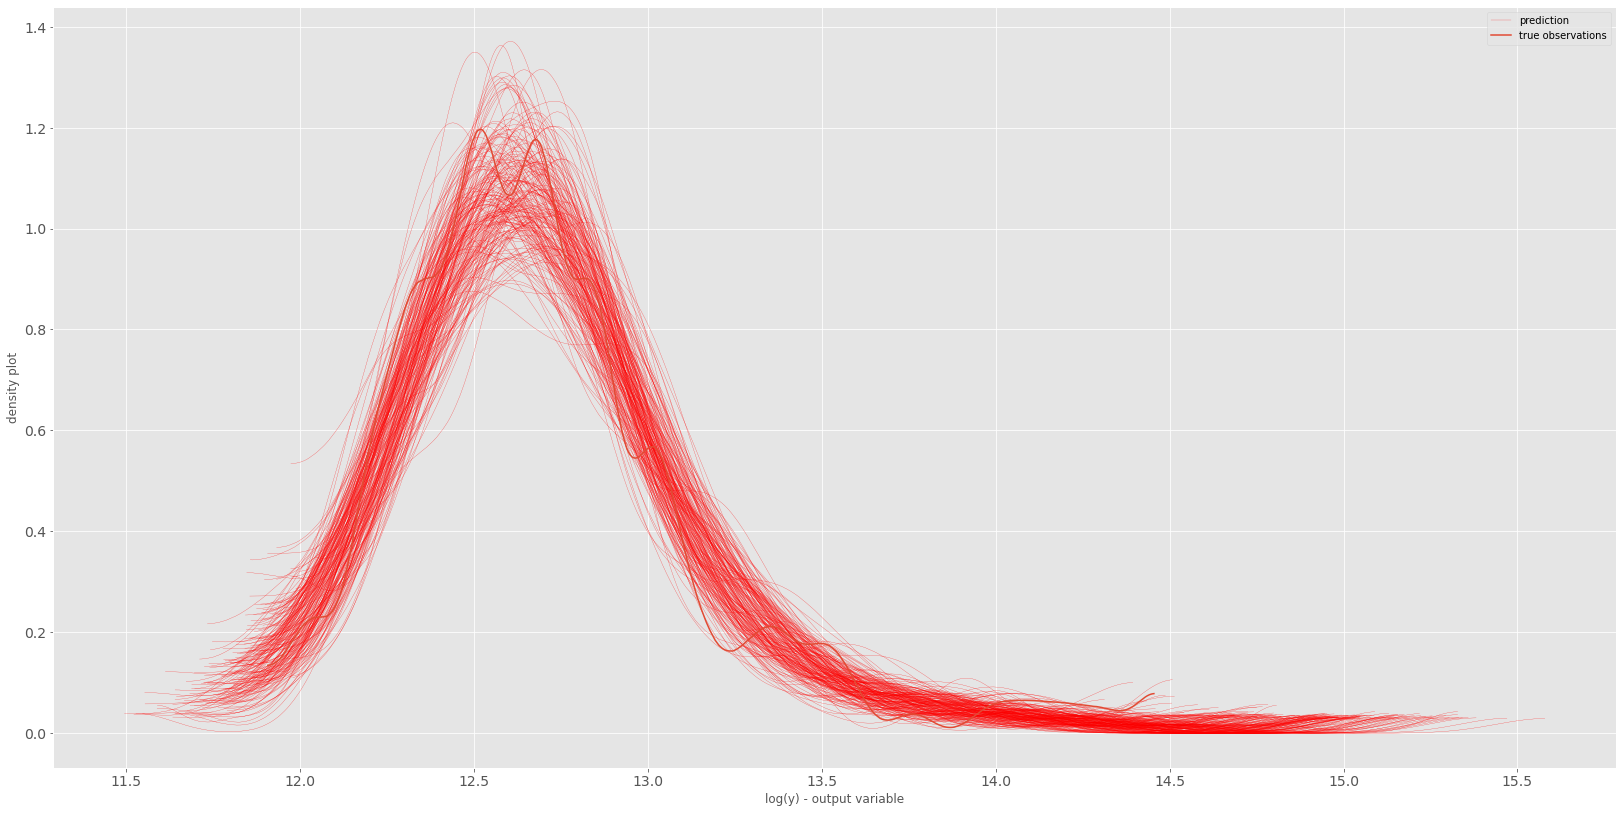

In [139]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Cluster 3

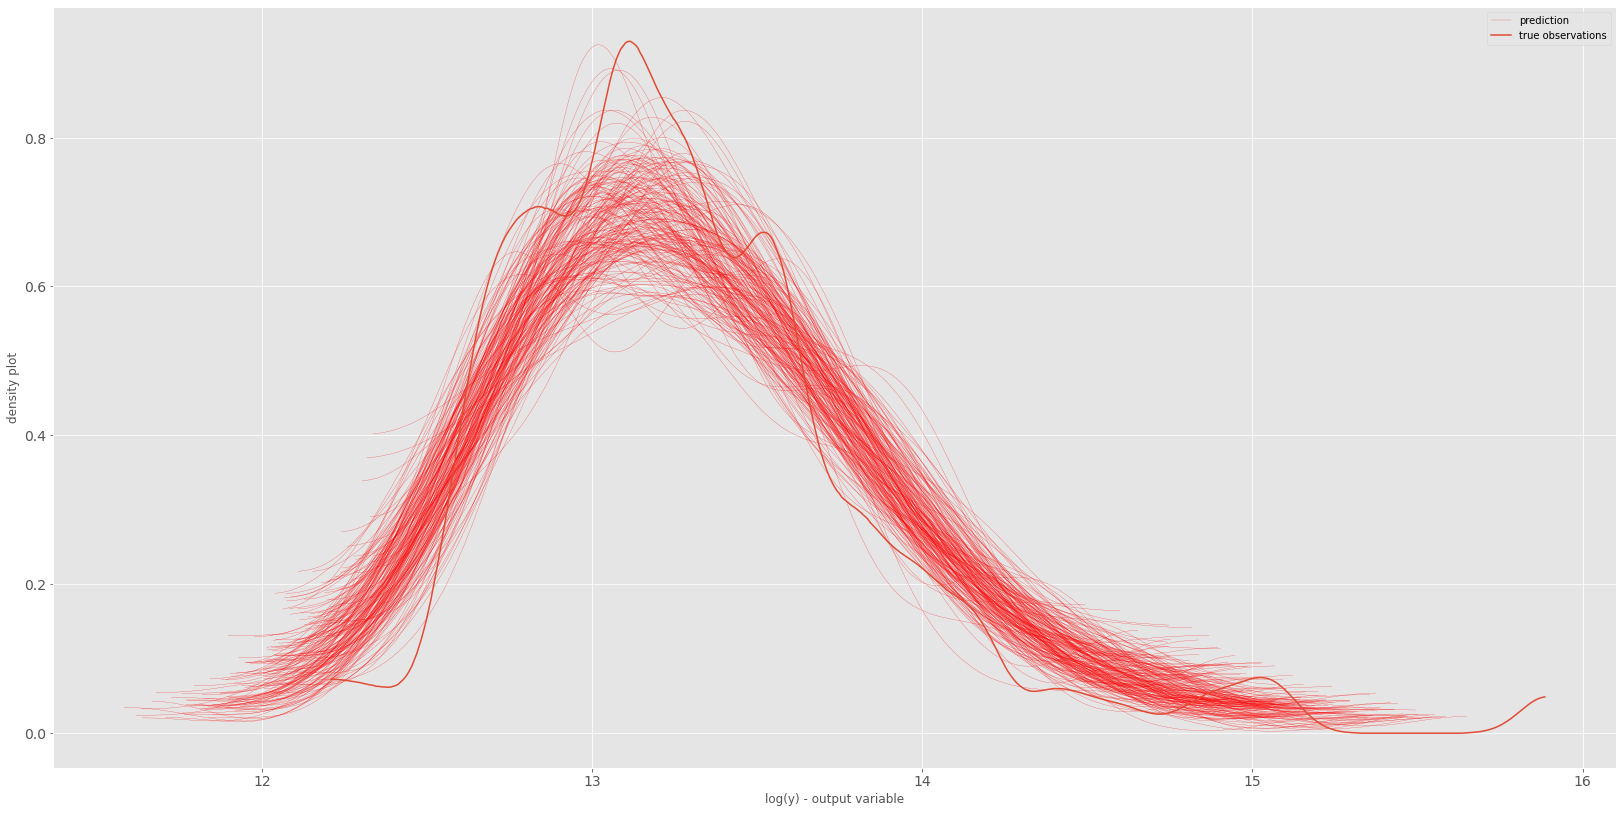

In [140]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Overall

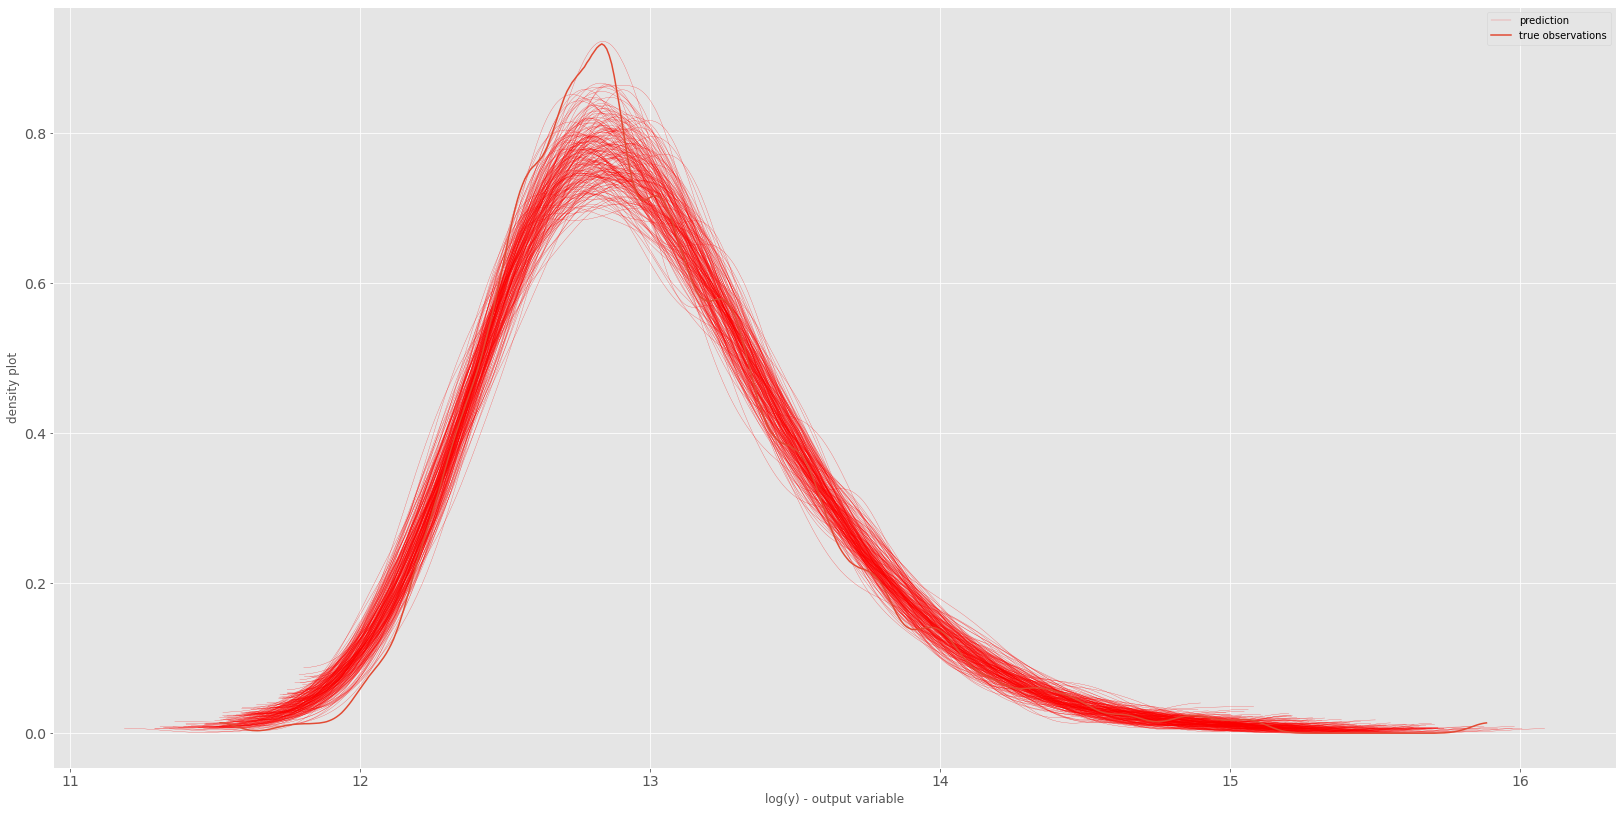

In [141]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Test set performance

In [142]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", MAE Cluster 0=",
      (np.mean(abs(y_pred_BLR0 - ys_test[clusters_test==0]))))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster 1=",
      (np.mean(abs(y_pred_BLR1 - ys_test[clusters_test==1]))))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster 2=",
      (np.mean(abs(y_pred_BLR2 - ys_test[clusters_test==2]))))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster 3=",
      (np.mean(abs(y_pred_BLR3 - ys_test[clusters_test==3]))))

#joint
joint=np.hstack([abs(y_pred_BLR0 - ys_test[clusters_test==0]),
                 abs(y_pred_BLR1 - ys_test[clusters_test==1]),
                 abs(y_pred_BLR2 - ys_test[clusters_test==2]),
                 abs(y_pred_BLR3 - ys_test[clusters_test==3])])

#MAE
print("MAE=",np.mean(joint))

Size Cluster0 185 , MAE Cluster 0= 111681.70770848359
Size Cluster1 62 , MAE Cluster 1= 78743.40785184193
Size Cluster2 73 , MAE Cluster 2= 77689.25865217138
Size Cluster3 91 , MAE Cluster 3= 174139.47848837957
MAE= 114504.17429911124


In [164]:
#We now need to predict the Final Test Values

#Add the index column back onto Test data
#Xn_test_with_index = np.hstack((dftest.Index[:, None],Xn_test))

#Create clusters for our test data
clusters_final_test = gmm.predict(Xn_kaggle_test[:,ind])
unique_test, counts_test = np.unique(clusters_final_test, return_counts=True)
print(dict(zip(unique_test, counts_test)))

#Get cluster with the index value included
Xtestn0_final = Xn_kaggle_test[clusters_final_test==0,:]
Xtestn1_final = Xn_kaggle_test[clusters_final_test==1,:]
Xtestn2_final = Xn_kaggle_test[clusters_final_test==2,:]
Xtestn3_final = Xn_kaggle_test[clusters_final_test==3,:]

#Store the indexes for cluster
idx_cluster0 = Xtestn0_final[:,0]
idx_cluster1 = Xtestn1_final[:,0]
idx_cluster2 = Xtestn2_final[:,0]
idx_cluster3 = Xtestn3_final[:,0]

y_pred_test0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0_final.T)))
y_pred_test1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1_final.T)))
y_pred_test2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2_final.T)))
y_pred_test3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3_final.T)))

{0: 330, 1: 101, 2: 130, 3: 141}


In [144]:
#JOin the CLuster indexes with their predicted value to ensure there is no mix up
pred_0 = np.hstack((idx_cluster0[:, None], y_pred_test0[:, None]))
pred_1 = np.hstack((idx_cluster1[:, None], y_pred_test1[:, None]))
pred_2 = np.hstack((idx_cluster2[:, None], y_pred_test2[:, None]))
pred_3 = np.hstack((idx_cluster3[:, None], y_pred_test3[:, None]))

#Combine all predicted results together
final_prediction_piecewise = np.vstack((pred_0, pred_1, pred_2, pred_3))

#Sort the final predictions on index again, just to have final index in order
final_prediction_piecewise = final_prediction_piecewise[final_prediction_piecewise[:, 0].argsort()]

In [145]:
#y_pred_BLR_piecewise = np.exp(yscaler.inverse_transform(joint_y_pred_BLR))
Piecewise_results = pd.DataFrame(final_prediction_piecewise[:,0], columns=['Price'])
Piecewise = pd.concat([index, Piecewise_results], axis=1)
Piecewise.to_csv(os.path.join("/content/drive/MyDrive/Colab Notebooks/ET5003_Kaggle_Comp/","piecewise_model.csv"),index=False)

### PPC on test set

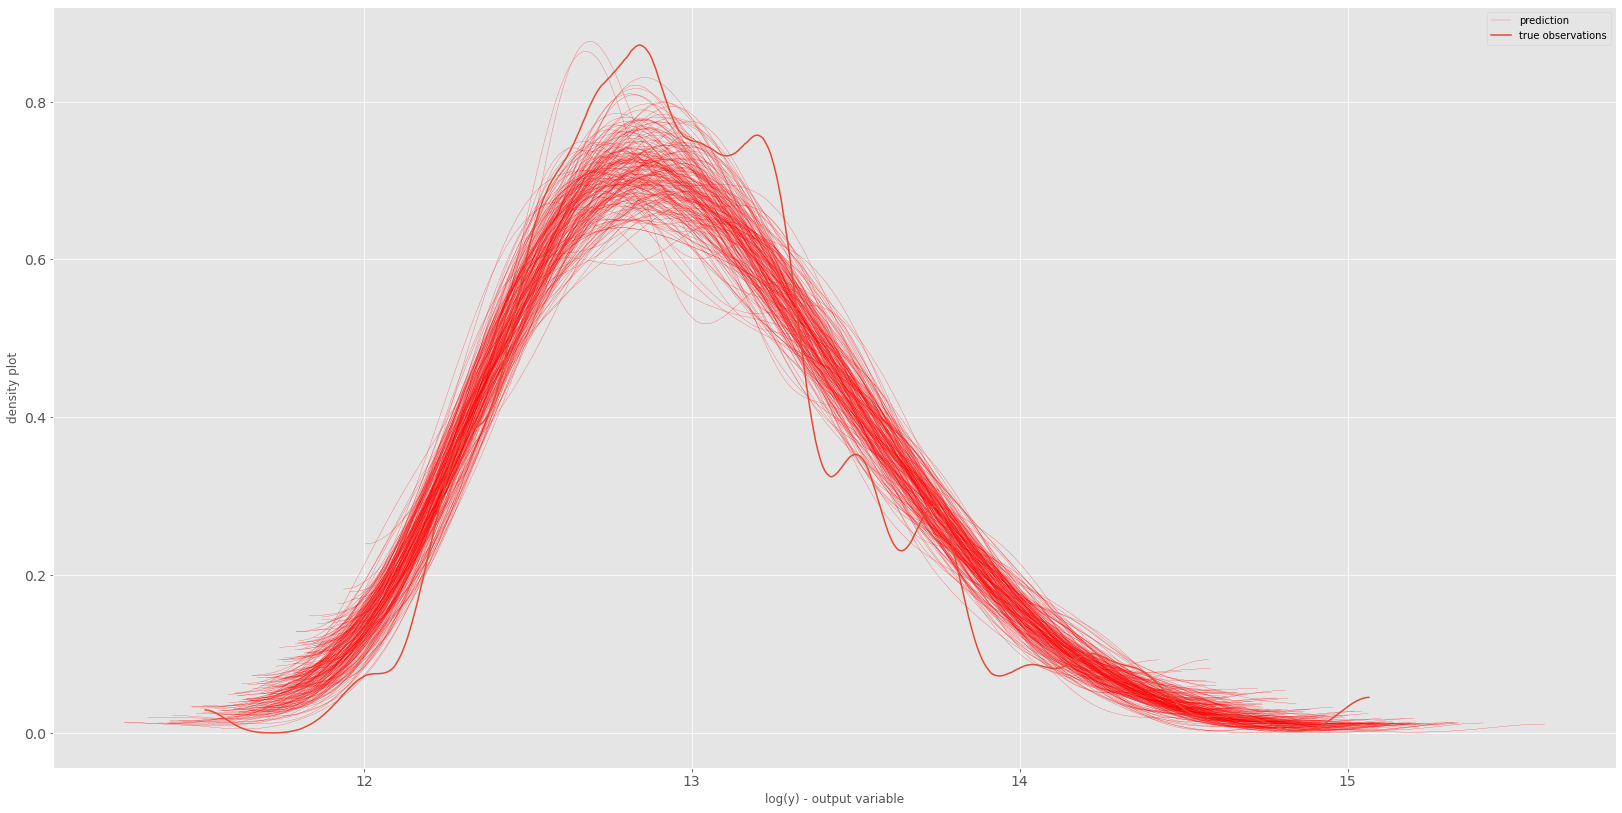

In [146]:
## Posterior predictive checks (PPCs)

num_samples2 = 200
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(y_test),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

We used an input layer, a hidden layer and an output layer in this network and take samples from the posterior to predict the price for the Bayesian NN model. We use the same features that we used for the baseline.

In [147]:
# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn_train.shape[0],1)), Xn_train])
floatX = theano.config.floatX

l = 15
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=1,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=1,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

In [148]:
# this can be slow because there are many parameters

# some parameters
par1 = 100  # start with 100, then use 1000+
par2 = 1000 # start with 1000, then use 10000+

# neural network
with neural_network:
    posterior = pm.sample(par1,tune=par2,chains=1)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w_0, w_1]


Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 599 seconds.
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [149]:
# we can do instead an approximated inference
param3 = 1000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.adam # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.01    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

Finished [100%]: Average Loss = 1,902.4


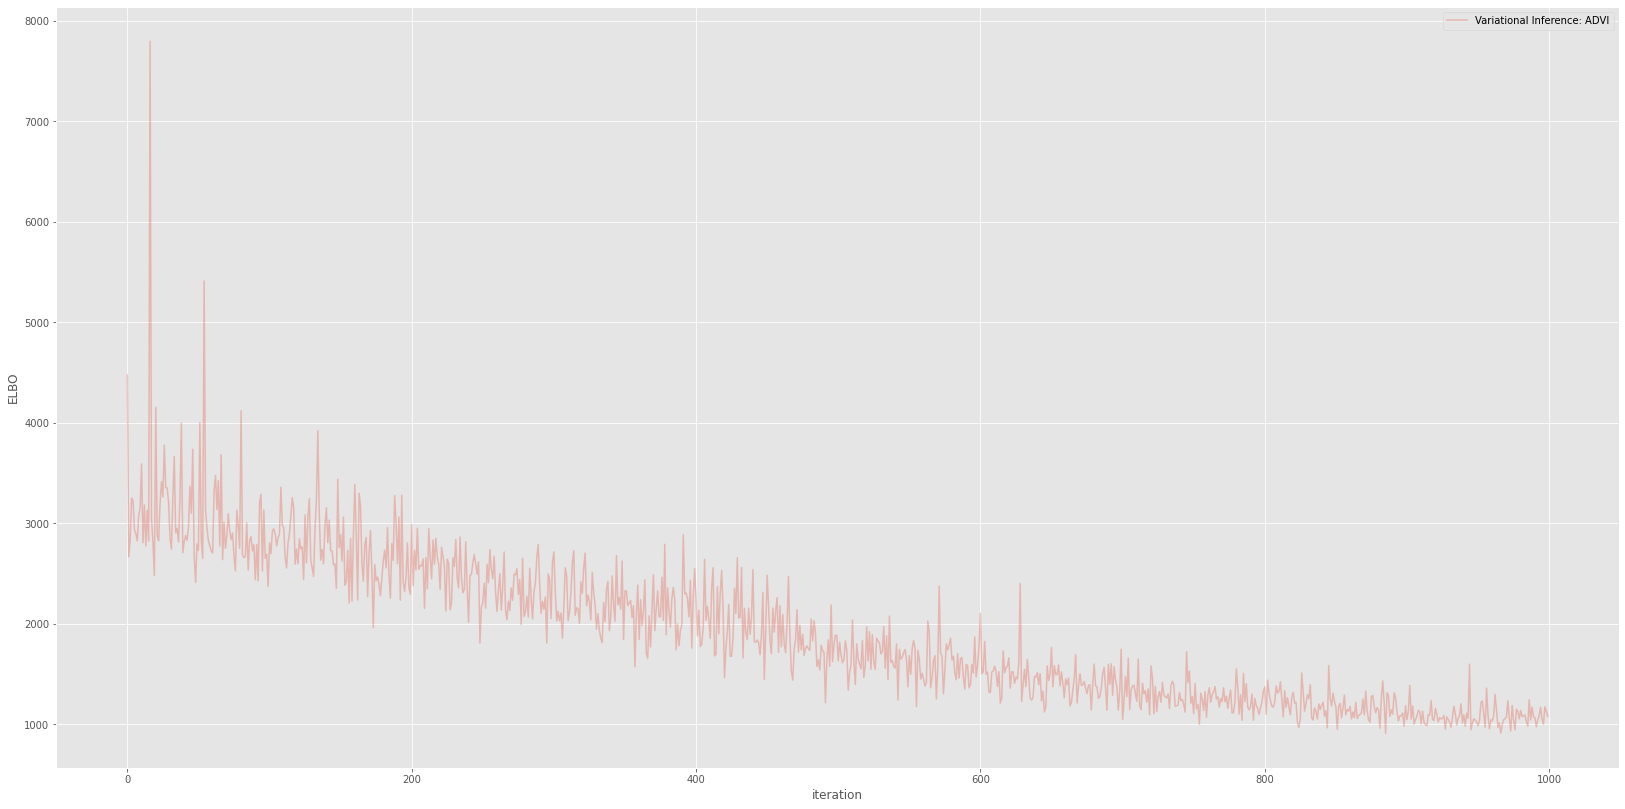

In [150]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
# Evidence Lower Bound (ELBO)
# https://en.wikipedia.org/wiki/Evidence_lower_bound
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [151]:
# draw samples from variational posterior
D = 500
posterior = approx.sample(draws=D)

In [152]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_test.shape[0],1)), Xn_test])
y_final_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_final_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_final_pred = np.array(y_final_pred).mean(axis=0)

In [153]:
#We need to do the inverse transformation and scaling that was carried out on the y values at the start
y_val_pred_final = np.exp(yscaler.inverse_transform(y_final_pred))

In [154]:
print("MAE = ",(np.mean(abs(y_val_pred_final - ys_test))))
print("MAPE = ",(np.mean(abs(y_val_pred_final - ys_test) / ys_test)))

MAE =  113513.70665501355
MAPE =  0.20686004689741186


In [155]:
# add a column of ones to include an intercept in the model
x3 = np.hstack([np.ones((Xn_kaggle_test.shape[0],1)), Xn_kaggle_test])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x3.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)

In [156]:
y_pred_out = np.exp(yscaler.inverse_transform(y_pred))
BayesianNN_results = pd.DataFrame(y_pred_out, columns=['Price'])
BayesianNN = pd.concat([index, BayesianNN_results], axis=1)
BayesianNN.to_csv(os.path.join("/content/drive/MyDrive/Colab Notebooks/ET5003_Kaggle_Comp/","bayesian_nn.csv"),index=False)

# SUMMARY

Like the trend that I have seen in the posts, I spent a lot of time on the EDA, Pre-processing and the NLP sections. However, I did learn a nice bit about NLP and vectorizing the results. This will come in useful in the future. The piecewise implementation was like the Etivity2 but there had to be amendments to output the results for Kaggle and we did not have the price for the test set. This was useful as this is more of a real-world example where you want to create a model that can handle unseen data. The Bayesian NN implementation also had to be amended to output the price results and this model produced the best results for me for the Kaggle upload.


**Data Pre-Processing & Exploratory Data Analysis (EDA)**


After analysing the data, I choose the following features as the standard input, but this was amended to suit the particular model that was consuming the data:


*   location (categorical)
*   num_bathrooms (numeric)
*   num_beds (numeric)
*   BER_class (categorical)
*   latitude (numeric)
*   longitude (numeric)
*   type (categorical)
*   surface (numeric)
*   description
*   features


**Natural language Processing (NLP)**


For the NLP example, I only used description and features as these were the only two suitable columns for this process. For the NLP process I did the following steps:


*   Removed all non-word values using regular expressions

*   Removed punctuation using regular expressions

*   Set all characters to lower case

*   Removed words that where less than 4 characters and stop words such as “the” and “it” etc.

*   Vectorize the description and features (Medium, 2020b)


If I had more time, I would have done work on lemming and stemming (Medium, 2020a). I found the NLP section useful and learned a lot although I was disappointed not to get more out of it in terms of feature extraction and price prediction.


**Piecewise Regression**


For the Piecewise and the Bayesian NN, I completed some additional pre-processing which was suitable for both models. I removed location as the Longitude and Latitude where better predictors based on the XGBoost feature importance (Brownlee, 2016). I also removed the Type after it was one hot encoded because the new features did provide much benefit. This left we me with the following features:


*   Surface

*   Longitude

*   Latitude

*   BER_Class

*   Num_Bathrooms

*   Num_Beds



Like Etivity2, I used a mapper taken from Pathak, (2020) to encode location due to there being 137 distinct areas so one-hot encoding did not seem suitable personally. I used ordinal encoding from Saxena, (2020) for BER which worked very well.


For the baseline model, I got the following scores


*   Mean Average Error (MAE) =  125622.04184001988

*   Mean Average absolute Percentage (MAPE) =  0.22544608710772468

*   Root Mean Squared Logarithmic Error (RMSLE) on the validation data =  0.28720270879041515

*   Average Loss: 871.09

This was not fantastic, and the best RMSLE I got in Kaggle was 0.81864
I then choose longitude and latitude as the clusters in the gaussian mixture model which was the same as last week and I got the following results on the training and validation data:


Validation Set Performance:

*   Size Cluster0 185 , MAE Cluster 0= 111681.70770848359
*   Size Cluster1 62 , MAE Cluster 1= 78743.40785184193
*   Size Cluster2 73 , MAE Cluster 2= 77689.25865217138
*   Size Cluster3 91 , MAE Cluster 3= 174139.47848837957
*   MAE= 114504.17429911124


I was disappointed to see that I got a worse result in Kaggle of 1.71142 we see that the MAE has reduced from the baseline model. Piecewise regression uses a set of locally linear line segments that can model any complex, non-linear function therefore striking a balance between both short term interpretability and long term flexibility simultaneously (Poh et al., 2017).


My opinion has not changed on Piecewise regression as this is a very useful algorithm for data of this nature. I will investigate using this for my dissertation which requires time series analyse. According to  Wagner et al., (2002), segmented regression analysis is an effective statistical method for valuing intervention effects in time series studies.

**Bayesian Neural Network (NN)**

We used an input layer, a hidden layer and an output layer in this network and take samples from the posterior to predict the price for the Bayesian NN model. I got my best Kaggle RMSLE of 0.31523 and I got the following scores for the validation set:

*   MAE =  113513.70665501355
*   MAPE =  0.20686004689741186

The MAE is slightly worse than the Baseline model while the MAPE is slightly better. The advantage of the Bayesian NN is that they care about uncertainty a lot and with this model we get the best results for this exercise as expected (Gordon, 2021).

**Findings. Insights & Discussions**

As contrary as it sounds. If I was doing this exercise again giving the same time parameters I would not spend as much time on the NLP section as it did not yield great results but if had more time than this I would focus on the NLP as this could be one way to improve the accuracy of the prediction. I believe the key is the data pre-processing in terms of improving the score, so this is a worthwhile exercise to spend a lot of time although people wanted to spend more time on the other sections for learning purposes.

I took a lot of inspiration from Mike, Nigel, Olga and Daire around the use of XGBoost feature importance for selecting the best features. My discussion with Mike and Brian helped me develop my solution especially around handling of missing values and calculating the missing errors correctly.



###References

Brownlee, J. (2016) Feature Importance and Feature Selection With XGBoost in Python. Available at: https://machinelearningmastery.com/
feature-importance-and-feature-selection-with-xgboost-in-python/ (Accessed: 16 October 2021).

Gordon, J. (2021) What is a Bayesian Neural Network? Available at: https://www.kdnuggets.com/2017/12/what-bayesian-neural-network.html (Accessed: 19 October 2021).

Medium (2020a) NLP with Real Estate Advertisements — Part 1. Available at: https://becominghuman.ai/nlp-with-real-estate-advertisements-part-1-55200e0cb33c (Accessed: 16 October 2021).

Medium (2020b) NLP with Real Estate Advertisements — Part 2. Available at: https://becominghuman.ai/nlp-with-real-estate-advertisements-part-2-f944e566644b (Accessed: 10 October 2021).

Pathak, M. (2020) Handling Categorical Data in Python. Available at: https://www.datacamp.com/community/tutorials/categorical-data (Accessed: 3 October 2021).

Poh, N. et al. (2017) ‘Probabilistic broken-stick model: A regression algorithm for irregularly sampled data with application to eGFR’, Journal of Biomedical Informatics, 76(November 2016), pp. 69–77. doi: 10.1016/j.jbi.2017.10.006.

Saxena, S. (2020) Here’s All you Need to Know About Encoding Categorical Data (with Python code). Available at: https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/ (Accessed: 1 October 2021).

Wagner, A. K. et al. (2002) ‘Segmented regression analysis of interrupted time series studies in medication use research’, Journal of Clinical Pharmacy and Therapeutics, 27(4), pp. 299–309. doi: 10.1046/j.1365-2710.2002.00430.x.



In [166]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('ET5003_Kaggle_Comp/ET5003_KaggleCompetition_Stephen_Quirke_20172257.ipynb')
27